In [1]:
#Importacao das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import catboost as cat
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error
from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import SplineTransformer, OneHotEncoder, StandardScaler

In [2]:
import sklearn
import sktime

In [3]:
print(sklearn.__version__)
print(sktime.__version__)

1.0.2
0.11.2


In [4]:
tb_comex = pd.read_csv("/Users/carolinalewin/Documents/Projeto3/SQL/VolumePorAno_Mes.csv")

In [5]:
tb_comex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   co_mes                   301 non-null    int64
 1   co_ano                   301 non-null    int64
 2   exp_kg_liquido_total     301 non-null    int64
 3   exp_vlr_total            301 non-null    int64
 4   exp_kg_liquido_russia    301 non-null    int64
 5   exp_vlr_russia           301 non-null    int64
 6   exp_kg_liquido_ucrania   301 non-null    int64
 7   exp_vlr_ucrania          301 non-null    int64
 8   pet_kg_liquido_total     301 non-null    int64
 9   pet_vlr_total            301 non-null    int64
 10  pet_kg_liquido_russia    301 non-null    int64
 11  pet_vlr_russia           301 non-null    int64
 12  pet_kg_liquido_ucrania   301 non-null    int64
 13  pet_vlr_ucrania          301 non-null    int64
 14  fert_kg_liquido_total    301 non-null    int64
 15  fert_v

In [6]:
tb_comex['data_ref'] =  tb_comex.apply(lambda x: date(year=x['co_ano'], month=x['co_mes'], day=1),axis=1)

In [7]:
tb_comex = tb_comex.sort_values(by=['data_ref'])

In [8]:
tb_comex_total = tb_comex[['data_ref',
                           'exp_kg_liquido_total','exp_vlr_total',
                           'pet_kg_liquido_total','pet_vlr_total',
                          'fert_kg_liquido_total','fert_vlr_total']]

Text(0.5, 1.0, 'Fertilizantes vs Comodities')

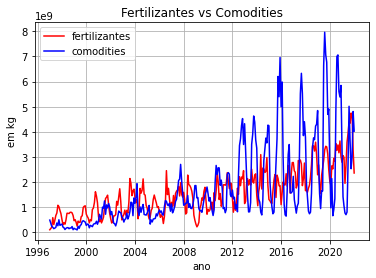

In [9]:
sns.lineplot(data=tb_comex,x = 'data_ref', y = 'fert_kg_liquido_total', color='red',label = 'fertilizantes')
sns.lineplot(data=tb_comex,x = 'data_ref', y = 'exp_kg_liquido_total', color='blue',label = 'comodities')
plt.xlabel('ano')
plt.ylabel('em kg')
plt.grid(True)
plt.legend()
plt.title('Fertilizantes vs Comodities')

''

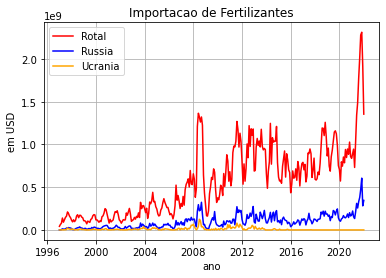

In [10]:
sns.lineplot(data=tb_comex,x = 'data_ref', y = 'fert_vlr_total', color = 'red',label='Rotal')
sns.lineplot(data=tb_comex,x = 'data_ref', y = 'fert_vlr_russia', color = 'blue',label='Russia')
sns.lineplot(data=tb_comex,x = 'data_ref', y = 'fert_vlr_ucrania', color = 'orange',label='Ucrania')
plt.xlabel('ano')
plt.ylabel('em USD')
plt.grid(True)
plt.legend()
plt.title('Importacao de Fertilizantes')
;

In [11]:
tb_comex['part_fert_russia'] = tb_comex['fert_kg_liquido_russia'] / tb_comex['fert_kg_liquido_total'] 
tb_comex['part_fert_ucrania'] = tb_comex['fert_kg_liquido_ucrania'] / tb_comex['fert_kg_liquido_total'] 

''

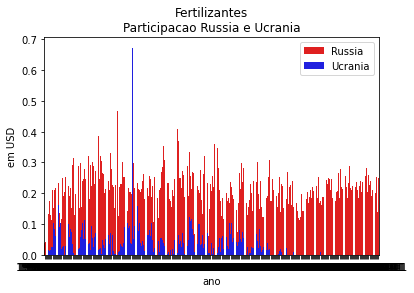

In [12]:
sns.barplot(data=tb_comex,x = 'data_ref', y = 'part_fert_russia', color = 'red',label='Russia')
sns.barplot(data=tb_comex,x = 'data_ref', y = 'part_fert_ucrania', color = 'blue',label='Ucrania')
plt.xlabel('ano')
plt.ylabel('em USD')
plt.grid(False)
plt.legend()
plt.title('Fertilizantes\nParticipacao Russia e Ucrania')
;

In [13]:
tb_comex_total

,data_ref,exp_kg_liquido_total,exp_vlr_total,pet_kg_liquido_total,pet_vlr_total,fert_kg_liquido_total,fert_vlr_total
0,1997-01-01,481607924,113565849,47030189,8483614,97152106,42226192
26,1997-02-01,349906348,102496322,892052427,235689437,150946852,64519757
51,1997-03-01,232974628,92264607,1158339511,260916926,198401392,77560176
76,1997-04-01,196173767,86137674,1586569015,326257365,579462825,139240426
101,1997-05-01,141985599,81703436,853152315,185214434,303487222,90277162
...,...,...,...,...,...,...,...
225,2021-09-01,3612218187,1136327562,2265255320,1255938546,4337467989,2016229051
250,2021-10-01,2528168179,971291679,3180159302,2021594502,4745684125,2281577210
275,2021-11-01,3012265482,1073793292,2285165020,1504281025,4589890577,2314136475
300,2021-12-01,4807760795,1603436868,2234881912,1431001992,3279563693,1921720691


In [14]:
tb_comex_total[tb_comex_total['data_ref'] == date(year=2016, month=1, day=1)]

,data_ref,exp_kg_liquido_total,exp_vlr_total,pet_kg_liquido_total,pet_vlr_total,fert_kg_liquido_total,fert_vlr_total
19,2016-01-01,4996304550,1036368674,519542851,140656604,1097648153,435050873


In [15]:
#Exportacao e Importacao serao avaliadas por quantidade nao por valor neste momento
#Exp
tb_comex_total['exp_shift_00'] = tb_comex_total['exp_kg_liquido_total']/4996304550
tb_comex_total['exp_shift_01'] = tb_comex_total['exp_kg_liquido_total'].shift(1)/4996304550
tb_comex_total['exp_shift_02'] = tb_comex_total['exp_kg_liquido_total'].shift(2)/4996304550
tb_comex_total['exp_shift_03'] = tb_comex_total['exp_kg_liquido_total'].shift(3)/4996304550
tb_comex_total['exp_shift_06'] = tb_comex_total['exp_kg_liquido_total'].shift(6)/4996304550
tb_comex_total['exp_shift_09'] = tb_comex_total['exp_kg_liquido_total'].shift(9)/4996304550
tb_comex_total['exp_shift_12'] = tb_comex_total['exp_kg_liquido_total'].shift(12)/4996304550
tb_comex_total['exp_shift_15'] = tb_comex_total['exp_kg_liquido_total'].shift(15)/4996304550
tb_comex_total['exp_shift_18'] = tb_comex_total['exp_kg_liquido_total'].shift(18)/4996304550
#Fert
tb_comex_total['fert_shift_00'] = tb_comex_total['fert_kg_liquido_total']/1097648153
tb_comex_total['fert_shift_01'] = tb_comex_total['fert_kg_liquido_total'].shift(1)/1097648153
tb_comex_total['fert_shift_02'] = tb_comex_total['fert_kg_liquido_total'].shift(2)/1097648153
tb_comex_total['fert_shift_03'] = tb_comex_total['fert_kg_liquido_total'].shift(3)/1097648153
tb_comex_total['fert_shift_06'] = tb_comex_total['fert_kg_liquido_total'].shift(6)/1097648153
tb_comex_total['fert_shift_09'] = tb_comex_total['fert_kg_liquido_total'].shift(9)/1097648153
tb_comex_total['fert_shift_12'] = tb_comex_total['fert_kg_liquido_total'].shift(12)/1097648153
tb_comex_total['fert_shift_15'] = tb_comex_total['fert_kg_liquido_total'].shift(15)/1097648153
tb_comex_total['fert_shift_18'] = tb_comex_total['fert_kg_liquido_total'].shift(18)/1097648153
#pet
tb_comex_total['pet_shift_00'] = tb_comex_total['pet_kg_liquido_total']/519542851
tb_comex_total['pet_shift_01'] = tb_comex_total['pet_kg_liquido_total'].shift(1)/519542851
tb_comex_total['pet_shift_02'] = tb_comex_total['pet_kg_liquido_total'].shift(2)/519542851
tb_comex_total['pet_shift_03'] = tb_comex_total['pet_kg_liquido_total'].shift(3)/519542851
tb_comex_total['pet_shift_06'] = tb_comex_total['pet_kg_liquido_total'].shift(6)/519542851
tb_comex_total['pet_shift_09'] = tb_comex_total['pet_kg_liquido_total'].shift(9)/519542851
tb_comex_total['pet_shift_12'] = tb_comex_total['pet_kg_liquido_total'].shift(12)/519542851
tb_comex_total['pet_shift_15'] = tb_comex_total['pet_kg_liquido_total'].shift(15)/519542851
tb_comex_total['pet_shift_18'] = tb_comex_total['pet_kg_liquido_total'].shift(18)/519542851


<ipython-input-15-dd7bcfc8004b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total['exp_shift_00'] = tb_comex_total['exp_kg_liquido_total']/4996304550
<ipython-input-15-dd7bcfc8004b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total['exp_shift_01'] = tb_comex_total['exp_kg_liquido_total'].shift(1)/4996304550
<ipython-input-15-dd7bcfc8004b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [16]:
#Feito por quantidade, faremos por volume financeiro
#Exportacao e Importacao serao avaliadas por quantidade nao por valor neste momento
#Exp
tb_comex_total['exp_shift_00_vlr'] = tb_comex_total['exp_vlr_total']/1036368674
tb_comex_total['exp_shift_01_vlr'] = tb_comex_total['exp_vlr_total'].shift(1)/1036368674
tb_comex_total['exp_shift_02_vlr'] = tb_comex_total['exp_vlr_total'].shift(2)/1036368674
tb_comex_total['exp_shift_03_vlr'] = tb_comex_total['exp_vlr_total'].shift(3)/1036368674
tb_comex_total['exp_shift_06_vlr'] = tb_comex_total['exp_vlr_total'].shift(6)/1036368674
tb_comex_total['exp_shift_09_vlr'] = tb_comex_total['exp_vlr_total'].shift(9)/1036368674
tb_comex_total['exp_shift_12_vlr'] = tb_comex_total['exp_vlr_total'].shift(12)/1036368674
tb_comex_total['exp_shift_15_vlr'] = tb_comex_total['exp_vlr_total'].shift(15)/1036368674
tb_comex_total['exp_shift_18_vlr'] = tb_comex_total['exp_vlr_total'].shift(18)/1036368674
#Fert
tb_comex_total['fert_shift_00_vlr'] = tb_comex_total['fert_vlr_total']/435050873
tb_comex_total['fert_shift_01_vlr'] = tb_comex_total['fert_vlr_total'].shift(1)/435050873
tb_comex_total['fert_shift_02_vlr'] = tb_comex_total['fert_vlr_total'].shift(2)/435050873
tb_comex_total['fert_shift_03_vlr'] = tb_comex_total['fert_vlr_total'].shift(3)/435050873
tb_comex_total['fert_shift_06_vlr'] = tb_comex_total['fert_vlr_total'].shift(6)/435050873
tb_comex_total['fert_shift_09_vlr'] = tb_comex_total['fert_vlr_total'].shift(9)/435050873
tb_comex_total['fert_shift_12_vlr'] = tb_comex_total['fert_vlr_total'].shift(12)/435050873
tb_comex_total['fert_shift_15_vlr'] = tb_comex_total['fert_vlr_total'].shift(15)/435050873
tb_comex_total['fert_shift_18_vlr'] = tb_comex_total['fert_vlr_total'].shift(18)/435050873
#pet
tb_comex_total['pet_shift_00_vlr'] = tb_comex_total['pet_vlr_total']/140656604
tb_comex_total['pet_shift_01_vlr'] = tb_comex_total['pet_vlr_total'].shift(1)/140656604
tb_comex_total['pet_shift_02_vlr'] = tb_comex_total['pet_vlr_total'].shift(2)/140656604
tb_comex_total['pet_shift_03_vlr'] = tb_comex_total['pet_vlr_total'].shift(3)/140656604
tb_comex_total['pet_shift_06_vlr'] = tb_comex_total['pet_vlr_total'].shift(6)/140656604
tb_comex_total['pet_shift_09_vlr'] = tb_comex_total['pet_vlr_total'].shift(9)/140656604
tb_comex_total['pet_shift_12_vlr'] = tb_comex_total['pet_vlr_total'].shift(12)/140656604
tb_comex_total['pet_shift_15_vlr'] = tb_comex_total['pet_vlr_total'].shift(15)/140656604
tb_comex_total['pet_shift_18_vlr'] = tb_comex_total['pet_vlr_total'].shift(18)/140656604

In [17]:
mask_2016 = tb_comex_total['data_ref'] > date(year=2015, month=12, day=31)
tb_comex_total = tb_comex_total[mask_2016]

In [18]:
tb_comex_total

,data_ref,exp_kg_liquido_total,exp_vlr_total,pet_kg_liquido_total,pet_vlr_total,fert_kg_liquido_total,fert_vlr_total,exp_shift_00,exp_shift_01,exp_shift_02,...,fert_shift_18_vlr,pet_shift_00_vlr,pet_shift_01_vlr,pet_shift_02_vlr,pet_shift_03_vlr,pet_shift_06_vlr,pet_shift_09_vlr,pet_shift_12_vlr,pet_shift_15_vlr,pet_shift_18_vlr
19,2016-01-01,4996304550,1036368674,519542851,140656604,1097648153,435050873,1.000000,1.393068,1.080164,...,2.481824,1.000000,3.131034,7.048275,4.084405,5.843320,5.540903,8.470245,8.571561,12.948225
45,2016-02-01,5983565304,1227443246,2007306326,798072556,1543039272,534702556,1.197598,1.000000,1.393068,...,2.361891,5.673907,1.000000,3.131034,7.048275,1.373651,5.857486,8.721982,10.917011,10.244581
70,2016-03-01,3033551313,797336960,2190597758,734929442,1998829540,690431599,0.607159,1.197598,1.000000,...,2.387625,5.224991,5.673907,1.000000,3.131034,3.772230,6.609158,7.474883,14.453615,13.058459
95,2016-04-01,1119955961,415583873,2052616816,704490782,1879952115,605447860,0.224157,0.607159,1.197598,...,2.387540,5.008587,5.224991,5.673907,1.000000,4.084405,5.843320,5.540903,8.470245,8.571561
120,2016-05-01,689543499,381258287,1830290353,611136394,1883560481,615031990,0.138011,0.224157,0.607159,...,2.784412,4.344882,5.008587,5.224991,5.673907,7.048275,1.373651,5.857486,8.721982,10.917011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2021-09-01,3612218187,1136327562,2265255320,1255938546,4337467989,2016229051,0.722978,1.003865,0.537050,...,1.832069,8.929112,12.736423,8.255120,8.509376,6.423679,4.845686,4.636302,2.922222,5.608755
250,2021-10-01,2528168179,971291679,3180159302,2021594502,4745684125,2281577210,0.506008,0.722978,1.003865,...,1.715382,14.372553,8.929112,12.736423,8.255120,8.644793,6.798137,4.741271,3.600016,4.308411
275,2021-11-01,3012265482,1073793292,2285165020,1504281025,4589890577,2314136475,0.602899,0.506008,0.722978,...,1.962078,10.694706,14.372553,8.929112,12.736423,7.906858,4.599718,4.913336,4.261749,2.610960
300,2021-12-01,4807760795,1603436868,2234881912,1431001992,3279563693,1921720691,0.962263,0.602899,0.506008,...,1.806174,10.173728,10.694706,14.372553,8.929112,8.509376,6.423679,4.845686,4.636302,2.922222


In [19]:
tb_comex_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 19 to 25
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               73 non-null     object 
 1   exp_kg_liquido_total   73 non-null     int64  
 2   exp_vlr_total          73 non-null     int64  
 3   pet_kg_liquido_total   73 non-null     int64  
 4   pet_vlr_total          73 non-null     int64  
 5   fert_kg_liquido_total  73 non-null     int64  
 6   fert_vlr_total         73 non-null     int64  
 7   exp_shift_00           73 non-null     float64
 8   exp_shift_01           73 non-null     float64
 9   exp_shift_02           73 non-null     float64
 10  exp_shift_03           73 non-null     float64
 11  exp_shift_06           73 non-null     float64
 12  exp_shift_09           73 non-null     float64
 13  exp_shift_12           73 non-null     float64
 14  exp_shift_15           73 non-null     float64
 15  exp_shi

''

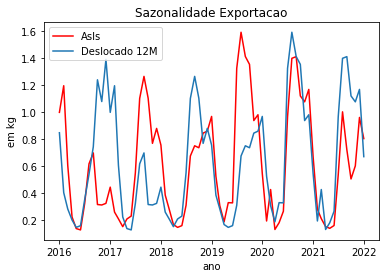

In [20]:
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_00',color = 'red',label='AsIs')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_01')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_02')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_03')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_06')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_09')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_12',label='Deslocado 12M') ### melhor ate agora
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_15')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_18')
plt.xlabel('ano')
plt.ylabel('em kg')
plt.grid(False)
plt.legend()
plt.title('Sazonalidade Exportacao')
;

''

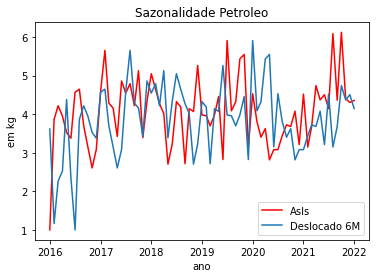

In [21]:
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_00',color = 'red',label = 'AsIs')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_01')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_02')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_03')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_06',label='Deslocado 6M') ### melhor ate agora
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_09')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_12')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_15')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_18')
plt.xlabel('ano')
plt.ylabel('em kg')
plt.grid(False)
plt.legend()
plt.title('Sazonalidade Petroleo')
;

''

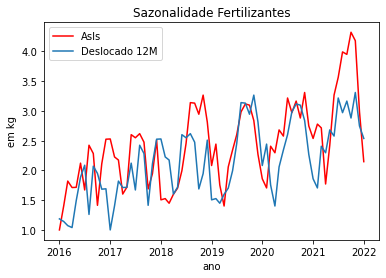

In [22]:
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_00',color = 'red',label='AsIs')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_01')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_02')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_03')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_06')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_09')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_12',label = 'Deslocado 12M') ### melhor ate agora
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_15')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_18')
plt.xlabel('ano')
plt.ylabel('em kg')
plt.grid(False)
plt.legend()
plt.title('Sazonalidade Fertilizantes')
;

''

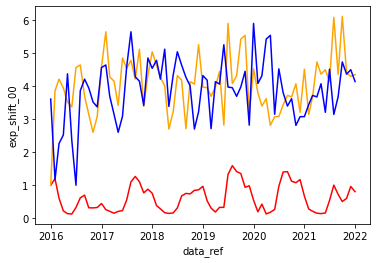

In [23]:
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_00', color = 'red')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_00', color = 'orange')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_01',color = 'blue')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_02',color = 'blue')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_03',color = 'blue')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_06',color = 'blue') ### melhor ate agora
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_09',color = 'blue')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_12',color = 'blue')
;

''

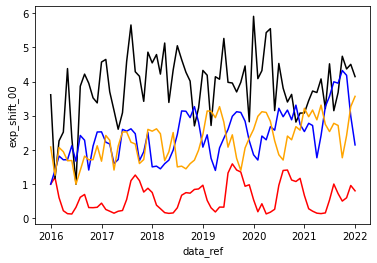

In [24]:
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_00',color = 'red')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_06',color = 'black')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_00', color = 'blue')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_01',color = 'orange')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_02',color = 'orange')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_03',color = 'orange')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_06',color = 'orange') ### ????
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_09',color = 'orange') 
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_09',color = 'orange')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_12',color = 'orange')
#sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_15',color = 'orange') ### melhor ate agora
;

''

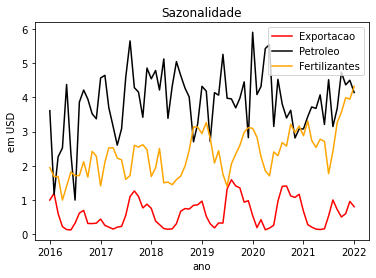

In [25]:
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_00',color = 'red',label='Exportacao')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_06',color = 'black',label='Petroleo')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_03',color = 'orange',label='Fertilizantes')
plt.xlabel('ano')
plt.ylabel('em USD')
plt.grid(False)
plt.legend()
plt.title('Sazonalidade')
;

''

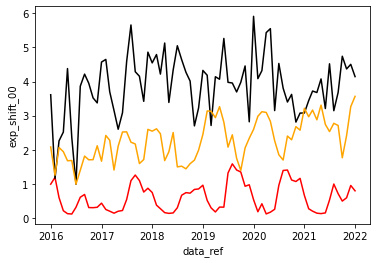

In [26]:
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_00',color = 'red')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_06',color = 'black')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_06',color = 'orange') 
;

''

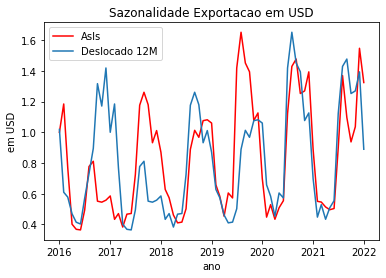

In [27]:
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_00_vlr',color = 'red',label='AsIs')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_12_vlr',label='Deslocado 12M') ### melhor valor da quantidade
plt.xlabel('ano')
plt.ylabel('em USD')
plt.grid(False)
plt.legend()
plt.title('Sazonalidade Exportacao em USD')
;

''

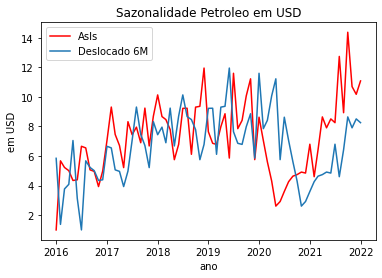

In [28]:
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_00_vlr',color = 'red',label='AsIs')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_06_vlr',label='Deslocado 6M') ### melhor valor da quantidade
plt.xlabel('ano')
plt.ylabel('em USD')
plt.grid(False)
plt.legend()
plt.title('Sazonalidade Petroleo em USD')
;

''

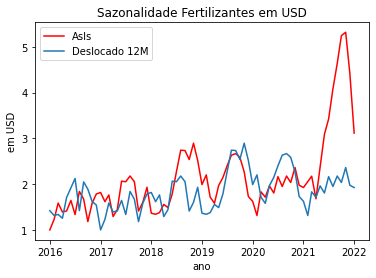

In [29]:
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_00_vlr',color = 'red',label='AsIs')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_12_vlr',label='Deslocado 12M') ### melhor valor da quantidade
plt.xlabel('ano')
plt.ylabel('em USD')
plt.grid(False)
plt.legend()
plt.title('Sazonalidade Fertilizantes em USD')
;

''

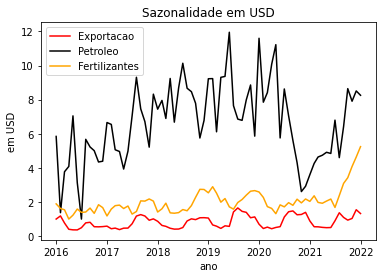

In [30]:
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'exp_shift_00_vlr',color = 'red',label='Exportacao')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'pet_shift_06_vlr',color = 'black',label='Petroleo')
sns.lineplot(data=tb_comex_total,x = 'data_ref', y = 'fert_shift_03_vlr',color = 'orange',label='Fertilizantes') 
plt.xlabel('ano')
plt.ylabel('em USD')
plt.grid(False)
plt.legend()
plt.title('Sazonalidade em USD')
;

In [31]:
tb_comex_total_2 = tb_comex[['data_ref',
                           'exp_kg_liquido_total','exp_vlr_total',
                           'pet_kg_liquido_total','pet_vlr_total',
                          'fert_kg_liquido_total','fert_vlr_total']]

In [32]:
tb_comex_total_2

,data_ref,exp_kg_liquido_total,exp_vlr_total,pet_kg_liquido_total,pet_vlr_total,fert_kg_liquido_total,fert_vlr_total
0,1997-01-01,481607924,113565849,47030189,8483614,97152106,42226192
26,1997-02-01,349906348,102496322,892052427,235689437,150946852,64519757
51,1997-03-01,232974628,92264607,1158339511,260916926,198401392,77560176
76,1997-04-01,196173767,86137674,1586569015,326257365,579462825,139240426
101,1997-05-01,141985599,81703436,853152315,185214434,303487222,90277162
...,...,...,...,...,...,...,...
225,2021-09-01,3612218187,1136327562,2265255320,1255938546,4337467989,2016229051
250,2021-10-01,2528168179,971291679,3180159302,2021594502,4745684125,2281577210
275,2021-11-01,3012265482,1073793292,2285165020,1504281025,4589890577,2314136475
300,2021-12-01,4807760795,1603436868,2234881912,1431001992,3279563693,1921720691


In [33]:
tb_comex_total_2['preco_exp'] = tb_comex_total_2['exp_vlr_total']/tb_comex_total_2['exp_kg_liquido_total']
tb_comex_total_2['preco_pet_shift06'] =  tb_comex_total_2['pet_vlr_total'].shift(6)/tb_comex_total_2['pet_kg_liquido_total'].shift(6)
tb_comex_total_2['preco_fert_shift03'] =  tb_comex_total_2['fert_vlr_total'].shift(3)/tb_comex_total_2['fert_kg_liquido_total'].shift(3)

<ipython-input-33-1c04e976a0aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_exp'] = tb_comex_total_2['exp_vlr_total']/tb_comex_total_2['exp_kg_liquido_total']
<ipython-input-33-1c04e976a0aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_pet_shift06'] =  tb_comex_total_2['pet_vlr_total'].shift(6)/tb_comex_total_2['pet_kg_liquido_total'].shift(6)
<ipython-input-33-1c04e976a0aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

''

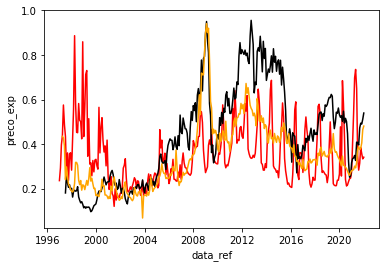

In [34]:
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp',color = 'red')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_pet_shift06',color = 'black')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_fert_shift03',color = 'orange')
;

In [35]:
tb_comex_total_2['preco_exp_mean12'] = tb_comex_total_2['preco_exp'].rolling(12).mean()
tb_comex_total_2['preco_pet_mean06'] = tb_comex_total_2['pet_vlr_total'].rolling(6).mean()/tb_comex_total_2['pet_kg_liquido_total'].rolling(6).mean()
tb_comex_total_2['preco_pet_mean03'] = tb_comex_total_2['pet_vlr_total'].rolling(3).mean()/tb_comex_total_2['pet_kg_liquido_total'].rolling(3).mean()

tb_comex_total_2['preco_fert_mean06'] = tb_comex_total_2['fert_vlr_total'].rolling(6).mean()/tb_comex_total_2['fert_kg_liquido_total'].rolling(6).mean()
tb_comex_total_2['preco_fert_mean03'] = tb_comex_total_2['fert_vlr_total'].rolling(3).mean()/tb_comex_total_2['fert_kg_liquido_total'].rolling(3).mean()


<ipython-input-35-6f06216cdd7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_exp_mean12'] = tb_comex_total_2['preco_exp'].rolling(12).mean()
<ipython-input-35-6f06216cdd7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_pet_mean06'] = tb_comex_total_2['pet_vlr_total'].rolling(6).mean()/tb_comex_total_2['pet_kg_liquido_total'].rolling(6).mean()
<ipython-input-35-6f06216cdd7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

''

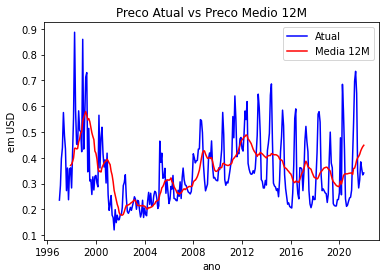

In [36]:
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp',color = 'blue',label='Atual')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp_mean12',color = 'red',label='Media 12M')
plt.xlabel('ano')
plt.ylabel('em USD')
plt.grid(False)
plt.legend()
plt.title('Preco Atual vs Preco Medio 12M')
;

''

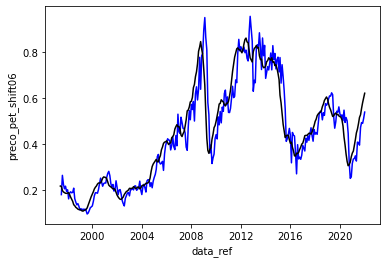

In [37]:
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_pet_shift06',color = 'blue')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_pet_mean06',color = 'black')
;

''

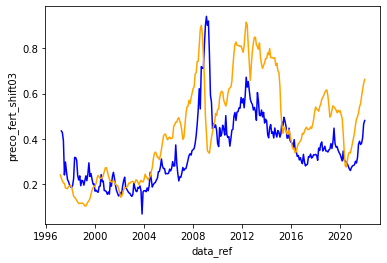

In [38]:
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_fert_shift03',color = 'blue') 
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_pet_mean03',color = 'orange') 
;

''

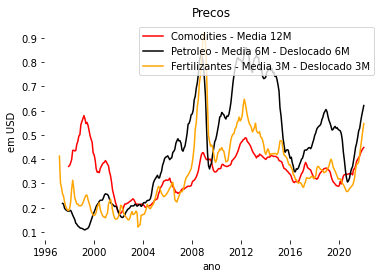

In [39]:
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp_mean12',color = 'red',label='Comodities - Media 12M')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_pet_mean06',color = 'black',label='Petroleo - Media 6M - Deslocado 6M')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_fert_mean03',color = 'orange',label='Fertilizantes - Media 3M - Deslocado 3M') 
sns.despine(left=True, bottom=True)
plt.xlabel('ano')
plt.ylabel('em USD')
plt.grid(False)
#plt.legend ()
plt.title('Precos')
;

''

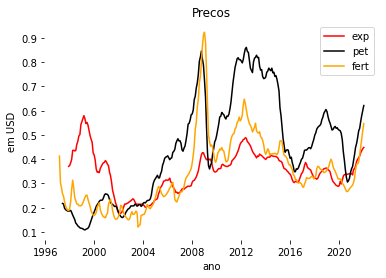

In [40]:
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp_mean12',color = 'red',label='exp')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_pet_mean06',color = 'black',label='pet')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_fert_mean03',color = 'orange',label='fert') 
sns.despine(left=True, bottom=True)
plt.xlabel('ano')
plt.ylabel('em USD')
plt.grid(False)
#plt.legend ()
plt.title('Precos')
;

In [41]:
#Precos em logaritmo - artificio para nao gerar precos negativos
tb_comex_total_2['preco_exp_mean12_log'] = tb_comex_total_2.apply(lambda x: np.log(x['preco_exp_mean12']),axis=1)
tb_comex_total_2['preco_pet_mean06_log'] = tb_comex_total_2.apply(lambda x: np.log(x['preco_pet_mean06']),axis=1)
tb_comex_total_2['preco_fert_mean03_log'] = tb_comex_total_2.apply(lambda x: np.log(x['preco_fert_mean03']),axis=1)

<ipython-input-41-0b8d5f08c2c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_exp_mean12_log'] = tb_comex_total_2.apply(lambda x: np.log(x['preco_exp_mean12']),axis=1)
<ipython-input-41-0b8d5f08c2c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_pet_mean06_log'] = tb_comex_total_2.apply(lambda x: np.log(x['preco_pet_mean06']),axis=1)
<ipython-input-41-0b8d5f08c2c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

No handles with labels found to put in legend.


''

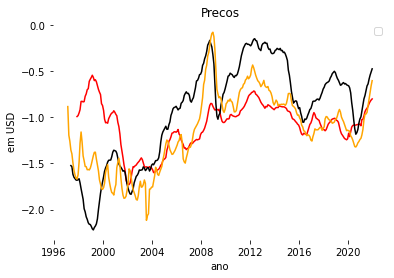

In [42]:
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp_mean12_log',color = 'red')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_pet_mean06_log',color = 'black')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_fert_mean03_log',color = 'orange') 
sns.despine(left=True, bottom=True)
plt.xlabel('ano')
plt.ylabel('em USD')
plt.grid(False)
plt.legend ()
plt.title('Precos')
;

In [43]:
#todas no lasse
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cross_decomposition import PLSRegression

In [44]:
tb_comex_total_2 = tb_comex[['data_ref',
                           'exp_kg_liquido_total','exp_vlr_total',
                           'pet_kg_liquido_total','pet_vlr_total',
                          'fert_kg_liquido_total','fert_vlr_total']]

In [45]:
tb_comex_total_2['preco_exp'] = tb_comex_total_2['exp_vlr_total']/tb_comex_total_2['exp_kg_liquido_total']
tb_comex_total_2['preco_exp_mean12'] = tb_comex_total_2['exp_vlr_total'].rolling(12).sum()/tb_comex_total_2['exp_kg_liquido_total'].rolling(12).sum()

<ipython-input-45-d4f3cf140440>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_exp'] = tb_comex_total_2['exp_vlr_total']/tb_comex_total_2['exp_kg_liquido_total']
<ipython-input-45-d4f3cf140440>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_exp_mean12'] = tb_comex_total_2['exp_vlr_total'].rolling(12).sum()/tb_comex_total_2['exp_kg_liquido_total'].rolling(12).sum()


In [46]:
tb_comex_total_2['preco_pet_shift00'] =  tb_comex_total_2['pet_vlr_total']/tb_comex_total_2['pet_kg_liquido_total']
tb_comex_total_2['preco_pet_shift06'] =  tb_comex_total_2['pet_vlr_total'].shift(6)/tb_comex_total_2['pet_kg_liquido_total'].shift(6)
tb_comex_total_2['preco_pet_mean06'] =  tb_comex_total_2['pet_vlr_total'].rolling(6).sum()/tb_comex_total_2['pet_kg_liquido_total'].rolling(6).sum()

<ipython-input-46-6ba8a3d2384c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_pet_shift00'] =  tb_comex_total_2['pet_vlr_total']/tb_comex_total_2['pet_kg_liquido_total']
<ipython-input-46-6ba8a3d2384c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_pet_shift06'] =  tb_comex_total_2['pet_vlr_total'].shift(6)/tb_comex_total_2['pet_kg_liquido_total'].shift(6)
<ipython-input-46-6ba8a3d2384c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [47]:
tb_comex_total_2['preco_fert_shift00'] =  tb_comex_total_2['fert_vlr_total']/tb_comex_total_2['fert_kg_liquido_total']
tb_comex_total_2['preco_fert_shift03'] =  tb_comex_total_2['fert_vlr_total'].shift(3)/tb_comex_total_2['fert_kg_liquido_total'].shift(3)
tb_comex_total_2['preco_fert_mean03'] =  tb_comex_total_2['fert_vlr_total'].rolling(3).sum()/tb_comex_total_2['fert_kg_liquido_total'].rolling(3).sum()
;

<ipython-input-47-a84573892692>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_fert_shift00'] =  tb_comex_total_2['fert_vlr_total']/tb_comex_total_2['fert_kg_liquido_total']
<ipython-input-47-a84573892692>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_fert_shift03'] =  tb_comex_total_2['fert_vlr_total'].shift(3)/tb_comex_total_2['fert_kg_liquido_total'].shift(3)
<ipython-input-47-a84573892692>:3: SettingWithCopyWarning: 
A value is trying to be set on a c

''

In [48]:
tb_comex_total_2['preco_exp_log'] = tb_comex_total_2.apply(lambda x: np.log(x['preco_exp']),axis=1)
tb_comex_total_2['preco_exp_mean12_log'] = tb_comex_total_2.apply(lambda x: np.log(x['preco_exp_mean12']),axis=1)

<ipython-input-48-2a6db0f20d14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_exp_log'] = tb_comex_total_2.apply(lambda x: np.log(x['preco_exp']),axis=1)
<ipython-input-48-2a6db0f20d14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['preco_exp_mean12_log'] = tb_comex_total_2.apply(lambda x: np.log(x['preco_exp_mean12']),axis=1)


In [49]:
#Exportacao e Importacao serao avaliadas por quantidade nao por valor neste momento
#Exp
tb_comex_total_2['exp_shift_00_vlr'] = tb_comex_total_2['exp_vlr_total']/1036368674
tb_comex_total_2['exp_shift_01_vlr'] = tb_comex_total_2['exp_vlr_total'].shift(1)/1036368674
tb_comex_total_2['exp_shift_02_vlr'] = tb_comex_total_2['exp_vlr_total'].shift(2)/1036368674
tb_comex_total_2['exp_shift_03_vlr'] = tb_comex_total_2['exp_vlr_total'].shift(3)/1036368674
tb_comex_total_2['exp_shift_06_vlr'] = tb_comex_total_2['exp_vlr_total'].shift(6)/1036368674
tb_comex_total_2['exp_shift_09_vlr'] = tb_comex_total_2['exp_vlr_total'].shift(9)/1036368674
tb_comex_total_2['exp_shift_12_vlr'] = tb_comex_total_2['exp_vlr_total'].shift(12)/1036368674
tb_comex_total_2['exp_shift_15_vlr'] = tb_comex_total_2['exp_vlr_total'].shift(15)/1036368674
tb_comex_total_2['exp_shift_18_vlr'] = tb_comex_total_2['exp_vlr_total'].shift(18)/1036368674
#Fert
tb_comex_total_2['fert_shift_00_vlr'] = tb_comex_total_2['fert_vlr_total']/435050873
tb_comex_total_2['fert_shift_01_vlr'] = tb_comex_total_2['fert_vlr_total'].shift(1)/435050873
tb_comex_total_2['fert_shift_02_vlr'] = tb_comex_total_2['fert_vlr_total'].shift(2)/435050873
tb_comex_total_2['fert_shift_03_vlr'] = tb_comex_total_2['fert_vlr_total'].shift(3)/435050873
tb_comex_total_2['fert_shift_06_vlr'] = tb_comex_total_2['fert_vlr_total'].shift(6)/435050873
tb_comex_total_2['fert_shift_09_vlr'] = tb_comex_total_2['fert_vlr_total'].shift(9)/435050873
tb_comex_total_2['fert_shift_12_vlr'] = tb_comex_total_2['fert_vlr_total'].shift(12)/435050873
tb_comex_total_2['fert_shift_15_vlr'] = tb_comex_total_2['fert_vlr_total'].shift(15)/435050873
tb_comex_total_2['fert_shift_18_vlr'] = tb_comex_total_2['fert_vlr_total'].shift(18)/435050873
#pet
tb_comex_total_2['pet_shift_00_vlr'] = tb_comex_total_2['pet_vlr_total']/140656604
tb_comex_total_2['pet_shift_01_vlr'] = tb_comex_total_2['pet_vlr_total'].shift(1)/140656604
tb_comex_total_2['pet_shift_02_vlr'] = tb_comex_total_2['pet_vlr_total'].shift(2)/140656604
tb_comex_total_2['pet_shift_03_vlr'] = tb_comex_total_2['pet_vlr_total'].shift(3)/140656604
tb_comex_total_2['pet_shift_06_vlr'] = tb_comex_total_2['pet_vlr_total'].shift(6)/140656604
tb_comex_total_2['pet_shift_09_vlr'] = tb_comex_total_2['pet_vlr_total'].shift(9)/140656604
tb_comex_total_2['pet_shift_12_vlr'] = tb_comex_total_2['pet_vlr_total'].shift(12)/140656604
tb_comex_total_2['pet_shift_15_vlr'] = tb_comex_total_2['pet_vlr_total'].shift(15)/140656604
tb_comex_total_2['pet_shift_18_vlr'] = tb_comex_total_2['pet_vlr_total'].shift(18)/140656604

#Exp
tb_comex_total_2['exp_shift_00'] = tb_comex_total_2['exp_kg_liquido_total']/4996304550
tb_comex_total_2['exp_shift_01'] = tb_comex_total_2['exp_kg_liquido_total'].shift(1)/4996304550
tb_comex_total_2['exp_shift_02'] = tb_comex_total_2['exp_kg_liquido_total'].shift(2)/4996304550
tb_comex_total_2['exp_shift_03'] = tb_comex_total_2['exp_kg_liquido_total'].shift(3)/4996304550
tb_comex_total_2['exp_shift_06'] = tb_comex_total_2['exp_kg_liquido_total'].shift(6)/4996304550
tb_comex_total_2['exp_shift_09'] = tb_comex_total_2['exp_kg_liquido_total'].shift(9)/4996304550
tb_comex_total_2['exp_shift_12'] = tb_comex_total_2['exp_kg_liquido_total'].shift(12)/4996304550
tb_comex_total_2['exp_shift_15'] = tb_comex_total_2['exp_kg_liquido_total'].shift(15)/4996304550
tb_comex_total_2['exp_shift_18'] = tb_comex_total_2['exp_kg_liquido_total'].shift(18)/4996304550
#Fert
tb_comex_total_2['fert_shift_00'] = tb_comex_total_2['fert_kg_liquido_total']/1097648153
tb_comex_total_2['fert_shift_01'] = tb_comex_total_2['fert_kg_liquido_total'].shift(1)/1097648153
tb_comex_total_2['fert_shift_02'] = tb_comex_total_2['fert_kg_liquido_total'].shift(2)/1097648153
tb_comex_total_2['fert_shift_03'] = tb_comex_total_2['fert_kg_liquido_total'].shift(3)/1097648153
tb_comex_total_2['fert_shift_06'] = tb_comex_total_2['fert_kg_liquido_total'].shift(6)/1097648153
tb_comex_total_2['fert_shift_09'] = tb_comex_total_2['fert_kg_liquido_total'].shift(9)/1097648153
tb_comex_total_2['fert_shift_12'] = tb_comex_total_2['fert_kg_liquido_total'].shift(12)/1097648153
tb_comex_total_2['fert_shift_15'] = tb_comex_total_2['fert_kg_liquido_total'].shift(15)/1097648153
tb_comex_total_2['fert_shift_18'] = tb_comex_total_2['fert_kg_liquido_total'].shift(18)/1097648153
#pet
tb_comex_total_2['pet_shift_00'] = tb_comex_total_2['pet_kg_liquido_total']/519542851
tb_comex_total_2['pet_shift_01'] = tb_comex_total_2['pet_kg_liquido_total'].shift(1)/519542851
tb_comex_total_2['pet_shift_02'] = tb_comex_total_2['pet_kg_liquido_total'].shift(2)/519542851
tb_comex_total_2['pet_shift_03'] = tb_comex_total_2['pet_kg_liquido_total'].shift(3)/519542851
tb_comex_total_2['pet_shift_06'] = tb_comex_total_2['pet_kg_liquido_total'].shift(6)/519542851
tb_comex_total_2['pet_shift_09'] = tb_comex_total_2['pet_kg_liquido_total'].shift(9)/519542851
tb_comex_total_2['pet_shift_12'] = tb_comex_total_2['pet_kg_liquido_total'].shift(12)/519542851
tb_comex_total_2['pet_shift_15'] = tb_comex_total_2['pet_kg_liquido_total'].shift(15)/519542851
tb_comex_total_2['pet_shift_18'] = tb_comex_total_2['pet_kg_liquido_total'].shift(18)/519542851
;

<ipython-input-49-73c14ca55cf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['exp_shift_00_vlr'] = tb_comex_total_2['exp_vlr_total']/1036368674
<ipython-input-49-73c14ca55cf9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_2['exp_shift_01_vlr'] = tb_comex_total_2['exp_vlr_total'].shift(1)/1036368674
<ipython-input-49-73c14ca55cf9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

''

In [50]:
#.diff():
#Exp
tb_comex_total_2['exp_diff_00_vlr'] = tb_comex_total_2['exp_vlr_total']
tb_comex_total_2['exp_diff_01_vlr'] = tb_comex_total_2['exp_vlr_total'].diff(1)
tb_comex_total_2['exp_diff_02_vlr'] = tb_comex_total_2['exp_vlr_total'].diff(2)
tb_comex_total_2['exp_diff_03_vlr'] = tb_comex_total_2['exp_vlr_total'].diff(3)
tb_comex_total_2['exp_diff_06_vlr'] = tb_comex_total_2['exp_vlr_total'].diff(6)
tb_comex_total_2['exp_diff_09_vlr'] = tb_comex_total_2['exp_vlr_total'].diff(9)
tb_comex_total_2['exp_diff_12_vlr'] = tb_comex_total_2['exp_vlr_total'].diff(12)
tb_comex_total_2['exp_diff_15_vlr'] = tb_comex_total_2['exp_vlr_total'].diff(15)
tb_comex_total_2['exp_diff_18_vlr'] = tb_comex_total_2['exp_vlr_total'].diff(18)
#Fert
tb_comex_total_2['fert_diff_00_vlr'] = tb_comex_total_2['fert_vlr_total']
tb_comex_total_2['fert_diff_01_vlr'] = tb_comex_total_2['fert_vlr_total'].diff(1)
tb_comex_total_2['fert_diff_02_vlr'] = tb_comex_total_2['fert_vlr_total'].diff(2)
tb_comex_total_2['fert_diff_03_vlr'] = tb_comex_total_2['fert_vlr_total'].diff(3)
tb_comex_total_2['fert_diff_06_vlr'] = tb_comex_total_2['fert_vlr_total'].diff(6)
tb_comex_total_2['fert_diff_09_vlr'] = tb_comex_total_2['fert_vlr_total'].diff(9)
tb_comex_total_2['fert_diff_12_vlr'] = tb_comex_total_2['fert_vlr_total'].diff(12)
tb_comex_total_2['fert_diff_15_vlr'] = tb_comex_total_2['fert_vlr_total'].diff(15)
tb_comex_total_2['fert_diff_18_vlr'] = tb_comex_total_2['fert_vlr_total'].diff(18)
#pet
tb_comex_total_2['pet_diff_00_vlr'] = tb_comex_total_2['pet_vlr_total']
tb_comex_total_2['pet_diff_01_vlr'] = tb_comex_total_2['pet_vlr_total'].diff(1)
tb_comex_total_2['pet_diff_02_vlr'] = tb_comex_total_2['pet_vlr_total'].diff(2)
tb_comex_total_2['pet_diff_03_vlr'] = tb_comex_total_2['pet_vlr_total'].diff(3)
tb_comex_total_2['pet_diff_06_vlr'] = tb_comex_total_2['pet_vlr_total'].diff(6)
tb_comex_total_2['pet_diff_09_vlr'] = tb_comex_total_2['pet_vlr_total'].diff(9)
tb_comex_total_2['pet_diff_12_vlr'] = tb_comex_total_2['pet_vlr_total'].diff(12)
tb_comex_total_2['pet_diff_15_vlr'] = tb_comex_total_2['pet_vlr_total'].diff(15)
tb_comex_total_2['pet_diff_18_vlr'] = tb_comex_total_2['pet_vlr_total'].diff(18)

#Exp
tb_comex_total_2['exp_diff_00'] = tb_comex_total_2['exp_kg_liquido_total']
tb_comex_total_2['exp_diff_01'] = tb_comex_total_2['exp_kg_liquido_total'].diff(1)
tb_comex_total_2['exp_diff_02'] = tb_comex_total_2['exp_kg_liquido_total'].diff(2)
tb_comex_total_2['exp_diff_03'] = tb_comex_total_2['exp_kg_liquido_total'].diff(3)
tb_comex_total_2['exp_diff_06'] = tb_comex_total_2['exp_kg_liquido_total'].diff(6)
tb_comex_total_2['exp_diff_09'] = tb_comex_total_2['exp_kg_liquido_total'].diff(9)
tb_comex_total_2['exp_diff_12'] = tb_comex_total_2['exp_kg_liquido_total'].diff(12)
tb_comex_total_2['exp_diff_15'] = tb_comex_total_2['exp_kg_liquido_total'].diff(15)
tb_comex_total_2['exp_diff_18'] = tb_comex_total_2['exp_kg_liquido_total'].diff(18)
#Fert
tb_comex_total_2['fert_diff_00'] = tb_comex_total_2['fert_kg_liquido_total']
tb_comex_total_2['fert_diff_01'] = tb_comex_total_2['fert_kg_liquido_total'].diff(1)
tb_comex_total_2['fert_diff_02'] = tb_comex_total_2['fert_kg_liquido_total'].diff(2)
tb_comex_total_2['fert_diff_03'] = tb_comex_total_2['fert_kg_liquido_total'].diff(3)
tb_comex_total_2['fert_diff_06'] = tb_comex_total_2['fert_kg_liquido_total'].diff(6)
tb_comex_total_2['fert_diff_09'] = tb_comex_total_2['fert_kg_liquido_total'].diff(9)
tb_comex_total_2['fert_diff_12'] = tb_comex_total_2['fert_kg_liquido_total'].diff(12)
tb_comex_total_2['fert_diff_15'] = tb_comex_total_2['fert_kg_liquido_total'].diff(15)
tb_comex_total_2['fert_diff_18'] = tb_comex_total_2['fert_kg_liquido_total'].diff(18)
#pet
tb_comex_total_2['pet_diff_00'] = tb_comex_total_2['pet_kg_liquido_total']
tb_comex_total_2['pet_diff_01'] = tb_comex_total_2['pet_kg_liquido_total'].diff(1)
tb_comex_total_2['pet_diff_02'] = tb_comex_total_2['pet_kg_liquido_total'].diff(2)
tb_comex_total_2['pet_diff_03'] = tb_comex_total_2['pet_kg_liquido_total'].diff(3)
tb_comex_total_2['pet_diff_06'] = tb_comex_total_2['pet_kg_liquido_total'].diff(6)
tb_comex_total_2['pet_diff_09'] = tb_comex_total_2['pet_kg_liquido_total'].diff(9)
tb_comex_total_2['pet_diff_12'] = tb_comex_total_2['pet_kg_liquido_total'].diff(12)
tb_comex_total_2['pet_diff_15'] = tb_comex_total_2['pet_kg_liquido_total'].diff(15)
tb_comex_total_2['pet_diff_18'] = tb_comex_total_2['pet_kg_liquido_total'].diff(18)
;

''

In [51]:
#.rolling().mean():
#Exp
tb_comex_total_2['exp_rolling_00_vlr'] = tb_comex_total_2['exp_vlr_total']
tb_comex_total_2['exp_rolling_01_vlr'] = tb_comex_total_2['exp_vlr_total'].rolling(1).mean()
tb_comex_total_2['exp_rolling_02_vlr'] = tb_comex_total_2['exp_vlr_total'].rolling(2).mean()
tb_comex_total_2['exp_rolling_03_vlr'] = tb_comex_total_2['exp_vlr_total'].rolling(3).mean()
tb_comex_total_2['exp_rolling_06_vlr'] = tb_comex_total_2['exp_vlr_total'].rolling(6).mean()
tb_comex_total_2['exp_rolling_09_vlr'] = tb_comex_total_2['exp_vlr_total'].rolling(9).mean()
tb_comex_total_2['exp_rolling_12_vlr'] = tb_comex_total_2['exp_vlr_total'].rolling(12).mean()
tb_comex_total_2['exp_rolling_15_vlr'] = tb_comex_total_2['exp_vlr_total'].rolling(15).mean()
tb_comex_total_2['exp_rolling_18_vlr'] = tb_comex_total_2['exp_vlr_total'].rolling(18).mean()
#Fert
tb_comex_total_2['fert_rolling_00_vlr'] = tb_comex_total_2['fert_vlr_total']
tb_comex_total_2['fert_rolling_01_vlr'] = tb_comex_total_2['fert_vlr_total'].rolling(1).mean()
tb_comex_total_2['fert_rolling_02_vlr'] = tb_comex_total_2['fert_vlr_total'].rolling(2).mean()
tb_comex_total_2['fert_rolling_03_vlr'] = tb_comex_total_2['fert_vlr_total'].rolling(3).mean()
tb_comex_total_2['fert_rolling_06_vlr'] = tb_comex_total_2['fert_vlr_total'].rolling(6).mean()
tb_comex_total_2['fert_rolling_09_vlr'] = tb_comex_total_2['fert_vlr_total'].rolling(9).mean()
tb_comex_total_2['fert_rolling_12_vlr'] = tb_comex_total_2['fert_vlr_total'].rolling(12).mean()
tb_comex_total_2['fert_rolling_15_vlr'] = tb_comex_total_2['fert_vlr_total'].rolling(15).mean()
tb_comex_total_2['fert_rolling_18_vlr'] = tb_comex_total_2['fert_vlr_total'].rolling(18).mean()
#pet
tb_comex_total_2['pet_rolling_00_vlr'] = tb_comex_total_2['pet_vlr_total']
tb_comex_total_2['pet_rolling_01_vlr'] = tb_comex_total_2['pet_vlr_total'].rolling(1).mean()
tb_comex_total_2['pet_rolling_02_vlr'] = tb_comex_total_2['pet_vlr_total'].rolling(2).mean()
tb_comex_total_2['pet_rolling_03_vlr'] = tb_comex_total_2['pet_vlr_total'].rolling(3).mean()
tb_comex_total_2['pet_rolling_06_vlr'] = tb_comex_total_2['pet_vlr_total'].rolling(6).mean()
tb_comex_total_2['pet_rolling_09_vlr'] = tb_comex_total_2['pet_vlr_total'].rolling(9).mean()
tb_comex_total_2['pet_rolling_12_vlr'] = tb_comex_total_2['pet_vlr_total'].rolling(12).mean()
tb_comex_total_2['pet_rolling_15_vlr'] = tb_comex_total_2['pet_vlr_total'].rolling(15).mean()
tb_comex_total_2['pet_rolling_18_vlr'] = tb_comex_total_2['pet_vlr_total'].rolling(18).mean()

#Exp
tb_comex_total_2['exp_rolling_00'] = tb_comex_total_2['exp_kg_liquido_total']
tb_comex_total_2['exp_rolling_01'] = tb_comex_total_2['exp_kg_liquido_total'].rolling(1).mean()
tb_comex_total_2['exp_rolling_02'] = tb_comex_total_2['exp_kg_liquido_total'].rolling(2).mean()
tb_comex_total_2['exp_rolling_03'] = tb_comex_total_2['exp_kg_liquido_total'].rolling(3).mean()
tb_comex_total_2['exp_rolling_06'] = tb_comex_total_2['exp_kg_liquido_total'].rolling(6).mean()
tb_comex_total_2['exp_rolling_09'] = tb_comex_total_2['exp_kg_liquido_total'].rolling(9).mean()
tb_comex_total_2['exp_rolling_12'] = tb_comex_total_2['exp_kg_liquido_total'].rolling(12).mean()
tb_comex_total_2['exp_rolling_15'] = tb_comex_total_2['exp_kg_liquido_total'].rolling(15).mean()
tb_comex_total_2['exp_rolling_18'] = tb_comex_total_2['exp_kg_liquido_total'].rolling(18).mean()
#Fert
tb_comex_total_2['fert_rolling_00'] = tb_comex_total_2['fert_kg_liquido_total']
tb_comex_total_2['fert_rolling_01'] = tb_comex_total_2['fert_kg_liquido_total'].rolling(1).mean()
tb_comex_total_2['fert_rolling_02'] = tb_comex_total_2['fert_kg_liquido_total'].rolling(2).mean()
tb_comex_total_2['fert_rolling_03'] = tb_comex_total_2['fert_kg_liquido_total'].rolling(3).mean()
tb_comex_total_2['fert_rolling_06'] = tb_comex_total_2['fert_kg_liquido_total'].rolling(6).mean()
tb_comex_total_2['fert_rolling_09'] = tb_comex_total_2['fert_kg_liquido_total'].rolling(9).mean()
tb_comex_total_2['fert_rolling_12'] = tb_comex_total_2['fert_kg_liquido_total'].rolling(12).mean()
tb_comex_total_2['fert_rolling_15'] = tb_comex_total_2['fert_kg_liquido_total'].rolling(15).mean()
tb_comex_total_2['fert_rolling_18'] = tb_comex_total_2['fert_kg_liquido_total'].rolling(18).mean()
#pet
tb_comex_total_2['pet_rolling_00'] = tb_comex_total_2['pet_kg_liquido_total']
tb_comex_total_2['pet_rolling_01'] = tb_comex_total_2['pet_kg_liquido_total'].rolling(1).mean()
tb_comex_total_2['pet_rolling_02'] = tb_comex_total_2['pet_kg_liquido_total'].rolling(2).mean()
tb_comex_total_2['pet_rolling_03'] = tb_comex_total_2['pet_kg_liquido_total'].rolling(3).mean()
tb_comex_total_2['pet_rolling_06'] = tb_comex_total_2['pet_kg_liquido_total'].rolling(6).mean()
tb_comex_total_2['pet_rolling_09'] = tb_comex_total_2['pet_kg_liquido_total'].rolling(9).mean()
tb_comex_total_2['pet_rolling_12'] = tb_comex_total_2['pet_kg_liquido_total'].rolling(12).mean()
tb_comex_total_2['pet_rolling_15'] = tb_comex_total_2['pet_kg_liquido_total'].rolling(15).mean()
tb_comex_total_2['pet_rolling_18'] = tb_comex_total_2['pet_kg_liquido_total'].rolling(18).mean()

In [52]:
#tb_comex_total_2.head()

In [53]:
#tb_comex_total_2.describe()

In [54]:
#print(tb_comex_total_2.columns.tolist())


In [55]:
#tb_comex_total_2

In [56]:
mask_1999 = tb_comex_total_2['data_ref'] > date(year=1998, month=12, day=31)
tb_comex_total_2 = tb_comex_total_2[mask_1999]

In [57]:
#tb_comex_total_2

In [58]:
#tb_comex_total_2.describe()

In [59]:
BAU = ['pet_kg_liquido_total', 'fert_kg_liquido_total',
       'preco_pet_shift00', 'preco_fert_shift00'
        ]

In [60]:
shift = ['pet_shift_06', 'fert_shift_03',
        'preco_pet_mean06', 'preco_fert_mean03',
        'preco_pet_shift06', 'preco_fert_shift03'   
        ]

In [61]:
chutes =['pet_shift_06', 'fert_shift_03'
        ,'preco_pet_mean06', 'preco_fert_mean03'
        ,'preco_pet_shift06', 'preco_fert_shift03'
         ,'pet_shift_03','pet_shift_01','pet_shift_02','pet_shift_06'
         ,'fert_shift_06','fert_shift_09'
         #,'preco_fert_mean06', 'preco_fert_mean09'
        ]

In [62]:
#preco_exp

In [63]:
X_var = chutes
y_var = 'preco_exp_log'
X_train, X_test, y_train, y_test = train_test_split(tb_comex_total_2[X_var], tb_comex_total_2[y_var], test_size = 0.2, random_state = 42)

In [64]:
reg_scaler = StandardScaler()
reg_scaler.fit(X_train)
las_fit = LassoCV(cv = 3)
las_fit.fit(reg_scaler.transform(X_train), y_train)

LassoCV(cv=3)

In [65]:
pred_reg = las_fit.predict(reg_scaler.transform(X_test))
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred_reg))}")

RMSE: 0.29633174436078263


In [66]:
pd.DataFrame(las_fit.coef_, index = X_var)

,0
pet_shift_06,-0.000000
fert_shift_03,-0.139845
preco_pet_mean06,0.110215
preco_fert_mean03,0.215609
preco_pet_shift06,-0.100716
preco_fert_shift03,-0.094108
pet_shift_03,0.010784
pet_shift_01,0.071861
pet_shift_02,0.036354
pet_shift_06,-0.000000


In [67]:
#tb_comex_total_2['pred_preco_las_BAU'] = las_fit.predict(reg_scaler.transform(tb_comex_total_2[BAU]))
#tb_comex_total_2['pred_preco_las_shift'] = las_fit.predict(reg_scaler.transform(tb_comex_total_2[shift]))
tb_comex_total_2['pred_preco_las_chutes'] = np.exp(las_fit.predict(reg_scaler.transform(tb_comex_total_2[chutes])))

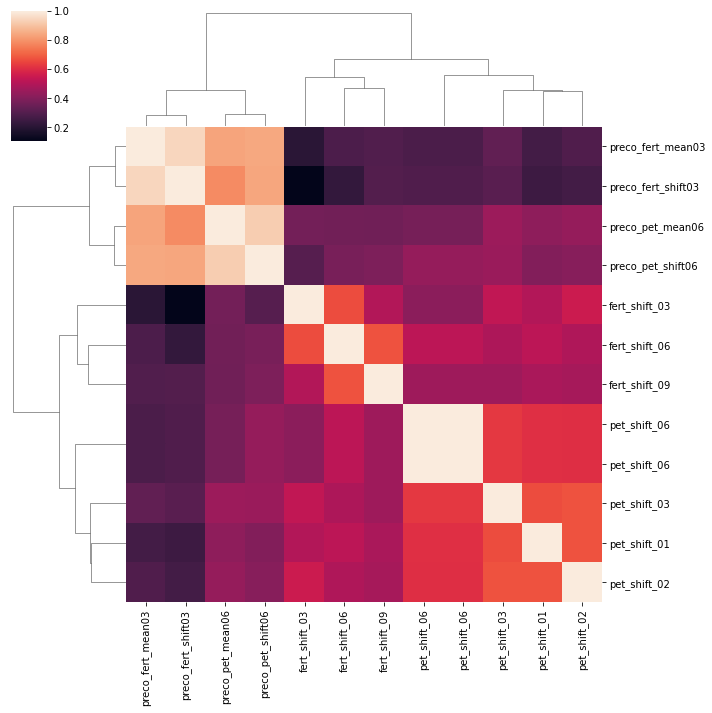

In [68]:
sns.clustermap(X_train.corr())

In [69]:
n=5
pls_fit = PLSRegression(n_components=n)
pls_fit.fit(X_train, y_train)

PLSRegression(n_components=5)

<AxesSubplot:xlabel='componente', ylabel='importancia'>

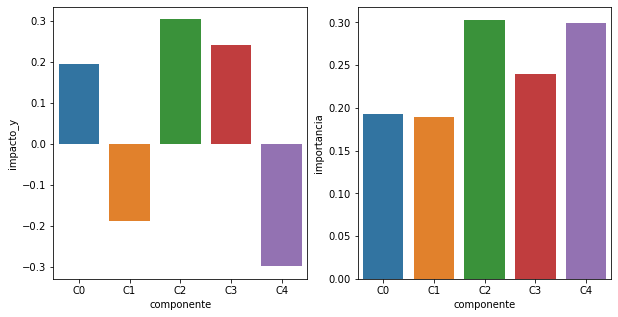

In [70]:
imp_componente = pd.DataFrame(
    pls_fit.y_loadings_.T, index=["C" + str(i) for i in range(n)], columns=["impacto_y"]
)
imp_componente["componente"] = imp_componente.index
imp_componente["importancia"] = abs(imp_componente["impacto_y"])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=imp_componente, y="impacto_y", x="componente", ax=ax[0])
sns.barplot(data=imp_componente, y="importancia", x="componente", ax=ax[1])


In [71]:
imp_var = pd.DataFrame(
    pls_fit.x_loadings_, index=X_train.columns, columns=["C" + str(i) for i in range(n)]
)
imp_var

,C0,C1,C2,C3,C4
pet_shift_06,0.291011,0.348322,0.157986,-0.697488,-0.476476
fert_shift_03,0.217404,0.520037,-0.450154,0.442303,0.278184
preco_pet_mean06,0.357724,-0.227258,-0.315451,0.188680,-0.151626
preco_fert_mean03,0.331513,-0.386676,-0.295929,0.212905,-0.163206
preco_pet_shift06,0.365066,-0.241369,-0.322626,-0.114499,0.181042
preco_fert_shift03,0.323316,-0.425784,-0.226141,-0.063526,0.142766
pet_shift_03,0.295648,0.280748,0.213158,-0.275965,-0.014508
pet_shift_01,0.285470,0.253906,0.547100,-0.057087,0.078988
pet_shift_02,0.287304,0.291599,0.338602,-0.064721,-0.043216
pet_shift_06,0.291011,0.348322,0.157986,-0.697488,-0.476476


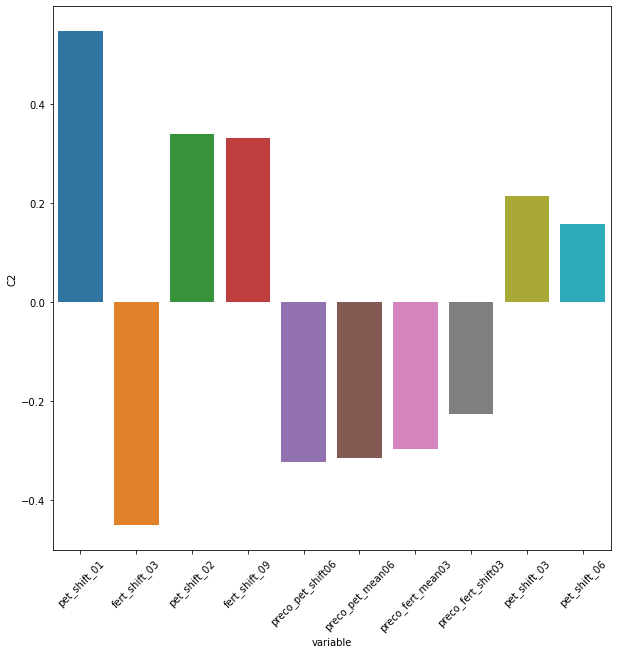

In [72]:
imp_var["variable"] = imp_var.index
fig, ax = plt.subplots(figsize=(10, 10))
component = "C2"
imp_var = imp_var.sort_values(component, ascending=False)
imp_var["abs_comp"] = abs(imp_var[component])
imp_var_sel = imp_var.nlargest(10, "abs_comp")
sns.barplot(data=imp_var_sel, y=component, x="variable")
plt.xticks(rotation=45);

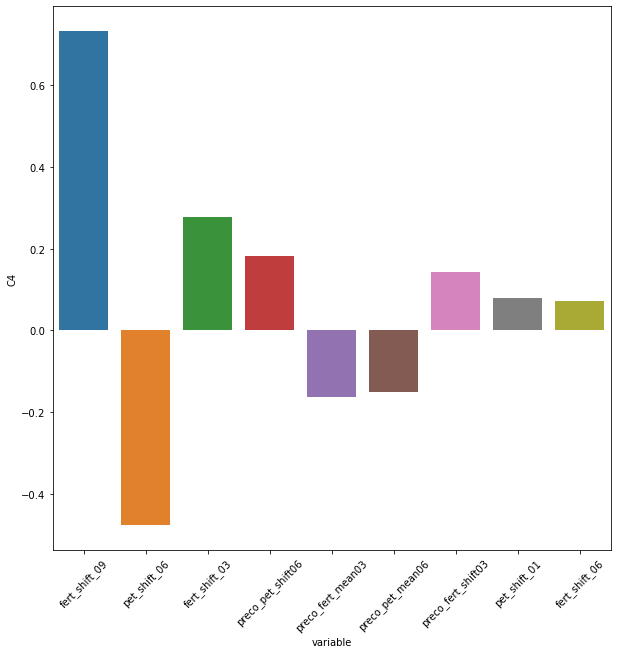

In [73]:
imp_var["variable"] = imp_var.index
fig, ax = plt.subplots(figsize=(10, 10))
component = "C4"
imp_var = imp_var.sort_values(component, ascending=False)
imp_var["abs_comp"] = abs(imp_var[component])
imp_var_sel = imp_var.nlargest(10, "abs_comp")
sns.barplot(data=imp_var_sel, y=component, x="variable")
plt.xticks(rotation=45);

In [74]:
y_pred = pls_fit.predict(X_test)
from sklearn.metrics import mean_squared_error

'''
# sem log
print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.mean(y_test), 2)}"
)
'''
print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.exp(np.mean(y_test)), 2)}"
)

Erro de $0.29 em $0.32


In [75]:
#tb_comex_total_2['pred_preco_pls_BAU'] = pls_fit.predict(reg_scaler.transform(tb_comex_total_2[BAU]))
#tb_comex_total_2['pred_preco_pls_shift'] = pls_fit.predict(reg_scaler.transform(tb_comex_total_2[shift]))
tb_comex_total_2['pred_preco_pls_chutes'] = np.exp(pls_fit.predict(reg_scaler.transform(tb_comex_total_2[chutes])))

/Users/carolinalewin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PLSRegression was fitted with feature names
  warnings.warn(


In [76]:
# preco_exp_mean12

In [77]:
X_var = chutes
y_var = 'preco_exp_mean12_log'
X_train, X_test, y_train, y_test = train_test_split(tb_comex_total_2[X_var], tb_comex_total_2[y_var], test_size = 0.2, random_state = 42)

In [78]:
reg_scaler = StandardScaler()
reg_scaler.fit(X_train)
las_fit = LassoCV(cv = 3)
las_fit.fit(reg_scaler.transform(X_train), y_train)

LassoCV(cv=3)

In [79]:
pred_reg = las_fit.predict(reg_scaler.transform(X_test))
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred_reg))}")

RMSE: 0.15285089332606192


In [80]:
pd.DataFrame(las_fit.coef_, index = X_var)

,0
pet_shift_06,0.009677
fert_shift_03,-0.048553
preco_pet_mean06,0.000000
preco_fert_mean03,0.141091
preco_pet_shift06,-0.000000
preco_fert_shift03,0.000000
pet_shift_03,0.023989
pet_shift_01,0.043518
pet_shift_02,0.039257
pet_shift_06,0.005574


In [82]:
#tb_comex_total_2['pred_precomedio_las_BAU'] = las_fit.predict(reg_scaler.transform(tb_comex_total_2[BAU]))
#tb_comex_total_2['pred_precomedio_las_shift'] = las_fit.predict(reg_scaler.transform(tb_comex_total_2[shift]))
tb_comex_total_2['pred_precomedio_las_chutes'] = np.exp(las_fit.predict(reg_scaler.transform(tb_comex_total_2[chutes])))

In [83]:
n=5
pls_fit = PLSRegression(n_components=n)
pls_fit.fit(X_train, y_train)

PLSRegression(n_components=5)

<AxesSubplot:xlabel='componente', ylabel='importancia'>

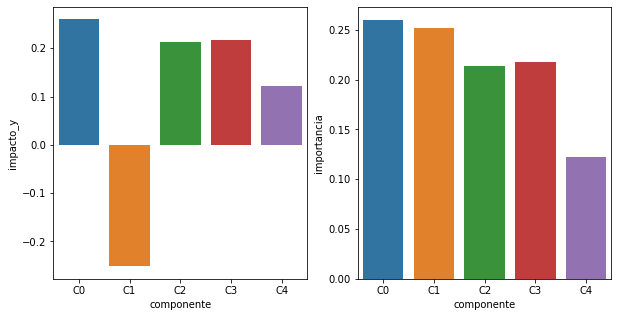

In [84]:
imp_componente = pd.DataFrame(
    pls_fit.y_loadings_.T, index=["C" + str(i) for i in range(n)], columns=["impacto_y"]
)
imp_componente["componente"] = imp_componente.index
imp_componente["importancia"] = abs(imp_componente["impacto_y"])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=imp_componente, y="impacto_y", x="componente", ax=ax[0])
sns.barplot(data=imp_componente, y="importancia", x="componente", ax=ax[1])


In [85]:
imp_var = pd.DataFrame(
    pls_fit.x_loadings_, index=X_train.columns, columns=["C" + str(i) for i in range(n)]
)
imp_var

,C0,C1,C2,C3,C4
pet_shift_06,0.295319,0.281911,0.372435,-0.638882,0.494170
fert_shift_03,0.195185,0.469828,-0.143762,0.204043,-0.308206
preco_pet_mean06,0.397605,-0.106449,-0.256058,-0.083341,-0.318721
preco_fert_mean03,0.380120,-0.237496,-0.274031,0.316222,0.252195
preco_pet_shift06,0.406572,-0.117002,-0.263481,-0.258666,-0.251017
preco_fert_shift03,0.373836,-0.270521,-0.238984,0.211561,0.226434
pet_shift_03,0.300075,0.252536,0.355373,0.076667,-0.342284
pet_shift_01,0.280337,0.282838,0.401032,0.308615,-0.261469
pet_shift_02,0.286406,0.279352,0.384216,0.301123,-0.314908
pet_shift_06,0.295319,0.281911,0.372435,-0.638882,0.494170


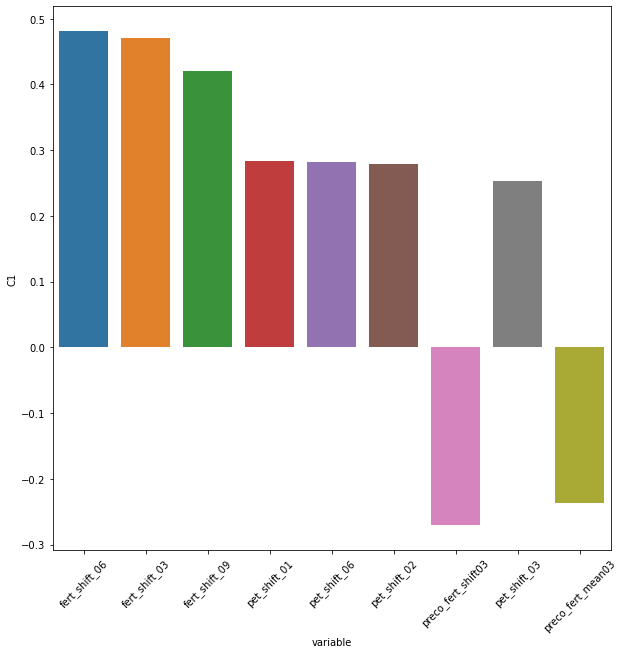

In [86]:
imp_var["variable"] = imp_var.index
fig, ax = plt.subplots(figsize=(10, 10))
component = "C1"
imp_var = imp_var.sort_values(component, ascending=False)
imp_var["abs_comp"] = abs(imp_var[component])
imp_var_sel = imp_var.nlargest(10, "abs_comp")
sns.barplot(data=imp_var_sel, y=component, x="variable")
plt.xticks(rotation=45);

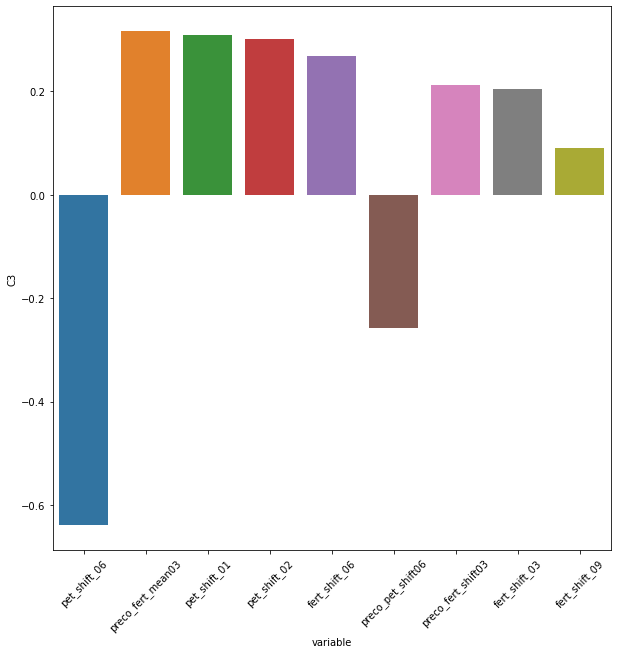

In [87]:
imp_var["variable"] = imp_var.index
fig, ax = plt.subplots(figsize=(10, 10))
component = "C3"
imp_var = imp_var.sort_values(component, ascending=False)
imp_var["abs_comp"] = abs(imp_var[component])
imp_var_sel = imp_var.nlargest(10, "abs_comp")
sns.barplot(data=imp_var_sel, y=component, x="variable")
plt.xticks(rotation=45);

In [88]:
y_pred = pls_fit.predict(X_test)
from sklearn.metrics import mean_squared_error
'''
# sem log
print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.mean(y_test), 2)}"
)
'''
print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.exp(np.mean(y_test)), 2)}"
)

Erro de $0.15 em $0.3


In [90]:
#tb_comex_total_2['pred_precomedio_pls_BAU'] = pls_fit.predict(reg_scaler.transform(tb_comex_total_2[BAU]))
#tb_comex_total_2['pred_precomedio_pls_shift'] = pls_fit.predict(reg_scaler.transform(tb_comex_total_2[shift]))
tb_comex_total_2['pred_precomedio_pls_chutes'] = np.exp(pls_fit.predict(reg_scaler.transform(tb_comex_total_2[chutes])))

/Users/carolinalewin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PLSRegression was fitted with feature names
  warnings.warn(


In [91]:
#media movel como resposta

In [92]:
# As listas com as variaves
# BAU
# Analise
# Chute

In [93]:
#tecnica PLS

In [94]:
#tb_comex_total_2

In [95]:
#print(tb_comex_total_2.columns.tolist())


In [96]:
'''
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp',color = 'red')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_BAU',color = 'black')
#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_shift',color = 'orange')
#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_chutes',color = 'blue')
sns.despine(left=True, bottom=True)
;
'''

"\nsns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp',color = 'red')\nsns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_BAU',color = 'black')\n#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_shift',color = 'orange')\n#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_chutes',color = 'blue')\nsns.despine(left=True, bottom=True)\n;\n"

In [97]:
'''
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp',color = 'red')
#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_BAU',color = 'black')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_shift',color = 'orange')
#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_chutes',color = 'blue')

sns.despine(left=True, bottom=True)
;
'''

"\nsns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp',color = 'red')\n#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_BAU',color = 'black')\nsns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_shift',color = 'orange')\n#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_chutes',color = 'blue')\n\nsns.despine(left=True, bottom=True)\n;\n"

''

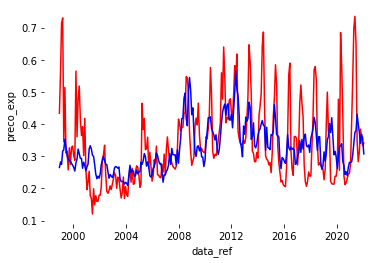

In [98]:
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp',color = 'red')
#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_BAU',color = 'black')
#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_shift',color = 'orange')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_preco_las_chutes',color = 'blue')

sns.despine(left=True, bottom=True)
;

In [99]:
'''
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp_mean12',color = 'red')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_BAU',color = 'black')
#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_shift',color = 'orange')
#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_chutes',color = 'blue')

sns.despine(left=True, bottom=True)
;
'''

"\nsns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp_mean12',color = 'red')\nsns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_BAU',color = 'black')\n#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_shift',color = 'orange')\n#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_chutes',color = 'blue')\n\nsns.despine(left=True, bottom=True)\n;\n"

In [100]:
'''
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp_mean12',color = 'red')
#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_BAU',color = 'black')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_shift',color = 'orange')
#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_chutes',color = 'blue')

sns.despine(left=True, bottom=True)
;
'''

"\nsns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp_mean12',color = 'red')\n#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_BAU',color = 'black')\nsns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_shift',color = 'orange')\n#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_chutes',color = 'blue')\n\nsns.despine(left=True, bottom=True)\n;\n"

''

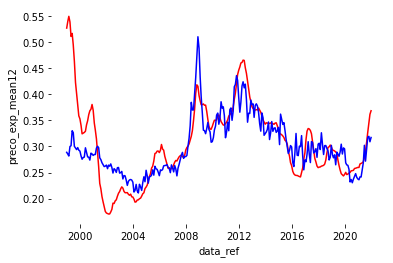

In [101]:
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'preco_exp_mean12',color = 'red')
#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_BAU',color = 'black')
#sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_shift',color = 'orange')
sns.lineplot(data=tb_comex_total_2,x = 'data_ref', y = 'pred_precomedio_las_chutes',color = 'blue')

sns.despine(left=True, bottom=True)
;

In [102]:
# faturamento - custo = receita
# exportacao - (petroleo + fertizantes + semente) = lucro bruto

In [103]:
# https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.forecasting.var.VAR.html#sktime.forecasting.var.VAR
# fazer cenarios
# head

In [104]:
# var

In [105]:
# quantidade exportada
# teto de capacidade (petro)
# desenv tecnologico (area plantada)
# preco e quantidade de fertilizante determina volume de producao

In [106]:
#Cenario Excel - sobe CSV

In [107]:
#tb_comex

In [108]:
#print(tb_comex.columns.tolist())
###VOLTAR AQUI###

In [109]:
tb_comex['exp_kg_liquido_outros'] = tb_comex['exp_kg_liquido_total'] - tb_comex['exp_kg_liquido_russia'] - tb_comex['exp_kg_liquido_ucrania']
tb_comex['exp_vlr_outros'] = tb_comex['exp_vlr_total'] - tb_comex['exp_vlr_russia'] - tb_comex['exp_vlr_ucrania']
tb_comex['pet_kg_liquido_outros'] = tb_comex['pet_kg_liquido_total']- tb_comex['pet_kg_liquido_russia']- tb_comex['pet_kg_liquido_ucrania']
tb_comex['pet_vlr_outros'] = tb_comex['pet_vlr_total'] -  tb_comex['pet_vlr_russia'] - tb_comex['pet_vlr_ucrania'] 
tb_comex['fert_kg_liquido_outros'] = tb_comex['fert_kg_liquido_total'] -tb_comex['fert_kg_liquido_russia'] -  tb_comex['fert_kg_liquido_ucrania']
tb_comex['fert_vlr_outros'] = tb_comex['fert_vlr_total']- tb_comex['fert_vlr_russia']-tb_comex['fert_vlr_ucrania']

In [110]:
tb_comex_total_3 = tb_comex[['data_ref'
                        ,'exp_kg_liquido_total','exp_vlr_total'
                        ,'exp_kg_liquido_outros','exp_vlr_outros'
                        ,'pet_kg_liquido_outros','pet_vlr_outros'
                        ,'fert_kg_liquido_outros','fert_vlr_outros'
                        ,'exp_kg_liquido_russia','exp_kg_liquido_ucrania'
                        ,'exp_vlr_russia','exp_vlr_ucrania'
                        ,'pet_kg_liquido_russia','pet_kg_liquido_ucrania'
                        ,'pet_vlr_russia','pet_vlr_ucrania'
                        ,'fert_kg_liquido_russia','fert_kg_liquido_ucrania'
                        ,'fert_vlr_russia','fert_vlr_ucrania'
                            ]]

In [111]:
#.rolling().mean():
#Exp
tb_comex_total_3['exp_rolling_00_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania']
tb_comex_total_3['exp_rolling_01_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].rolling(1).mean()
tb_comex_total_3['exp_rolling_02_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].rolling(2).mean()
tb_comex_total_3['exp_rolling_03_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].rolling(3).mean()
tb_comex_total_3['exp_rolling_06_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].rolling(6).mean()
tb_comex_total_3['exp_rolling_09_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].rolling(9).mean()
tb_comex_total_3['exp_rolling_12_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].rolling(12).mean()
tb_comex_total_3['exp_rolling_15_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].rolling(15).mean()
tb_comex_total_3['exp_rolling_18_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].rolling(18).mean()
#Fert
tb_comex_total_3['fert_rolling_00_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania']
tb_comex_total_3['fert_rolling_01_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].rolling(1).mean()
tb_comex_total_3['fert_rolling_02_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].rolling(2).mean()
tb_comex_total_3['fert_rolling_03_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].rolling(3).mean()
tb_comex_total_3['fert_rolling_06_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].rolling(6).mean()
tb_comex_total_3['fert_rolling_09_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].rolling(9).mean()
tb_comex_total_3['fert_rolling_12_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].rolling(12).mean()
tb_comex_total_3['fert_rolling_15_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].rolling(15).mean()
tb_comex_total_3['fert_rolling_18_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].rolling(18).mean()
#pet
tb_comex_total_3['pet_rolling_00_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania']
tb_comex_total_3['pet_rolling_01_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].rolling(1).mean()
tb_comex_total_3['pet_rolling_02_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].rolling(2).mean()
tb_comex_total_3['pet_rolling_03_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].rolling(3).mean()
tb_comex_total_3['pet_rolling_06_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].rolling(6).mean()
tb_comex_total_3['pet_rolling_09_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].rolling(9).mean()
tb_comex_total_3['pet_rolling_12_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].rolling(12).mean()
tb_comex_total_3['pet_rolling_15_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].rolling(15).mean()
tb_comex_total_3['pet_rolling_18_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].rolling(18).mean()

#Exp
tb_comex_total_3['exp_rolling_00_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania']
tb_comex_total_3['exp_rolling_01_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].rolling(1).mean()
tb_comex_total_3['exp_rolling_02_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].rolling(2).mean()
tb_comex_total_3['exp_rolling_03_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].rolling(3).mean()
tb_comex_total_3['exp_rolling_06_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].rolling(6).mean()
tb_comex_total_3['exp_rolling_09_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].rolling(9).mean()
tb_comex_total_3['exp_rolling_12_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].rolling(12).mean()
tb_comex_total_3['exp_rolling_15_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].rolling(15).mean()
tb_comex_total_3['exp_rolling_18_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].rolling(18).mean()
#Fert
tb_comex_total_3['fert_rolling_00_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania']
tb_comex_total_3['fert_rolling_01_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].rolling(1).mean()
tb_comex_total_3['fert_rolling_02_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].rolling(2).mean()
tb_comex_total_3['fert_rolling_03_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].rolling(3).mean()
tb_comex_total_3['fert_rolling_06_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].rolling(6).mean()
tb_comex_total_3['fert_rolling_09_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].rolling(9).mean()
tb_comex_total_3['fert_rolling_12_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].rolling(12).mean()
tb_comex_total_3['fert_rolling_15_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].rolling(15).mean()
tb_comex_total_3['fert_rolling_18_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].rolling(18).mean()
#pet
tb_comex_total_3['pet_rolling_00_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania']
tb_comex_total_3['pet_rolling_01_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].rolling(1).mean()
tb_comex_total_3['pet_rolling_02_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].rolling(2).mean()
tb_comex_total_3['pet_rolling_03_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].rolling(3).mean()
tb_comex_total_3['pet_rolling_06_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].rolling(6).mean()
tb_comex_total_3['pet_rolling_09_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].rolling(9).mean()
tb_comex_total_3['pet_rolling_12_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].rolling(12).mean()
tb_comex_total_3['pet_rolling_15_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].rolling(15).mean()
tb_comex_total_3['pet_rolling_18_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].rolling(18).mean()

<ipython-input-111-0ee58986c942>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_3['exp_rolling_00_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania']
<ipython-input-111-0ee58986c942>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_3['exp_rolling_01_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].rolling(1).mean()
<ipython-input-111-0ee58986c942>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [112]:
#.rolling().mean():
#Exp
tb_comex_total_3['exp_rolling_00_vlr_russia'] = tb_comex_total_3['exp_vlr_russia']
tb_comex_total_3['exp_rolling_01_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].rolling(1).mean()
tb_comex_total_3['exp_rolling_02_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].rolling(2).mean()
tb_comex_total_3['exp_rolling_03_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].rolling(3).mean()
tb_comex_total_3['exp_rolling_06_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].rolling(6).mean()
tb_comex_total_3['exp_rolling_09_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].rolling(9).mean()
tb_comex_total_3['exp_rolling_12_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].rolling(12).mean()
tb_comex_total_3['exp_rolling_15_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].rolling(15).mean()
tb_comex_total_3['exp_rolling_18_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].rolling(18).mean()
#Fert
tb_comex_total_3['fert_rolling_00_vlr_russia'] = tb_comex_total_3['fert_vlr_russia']
tb_comex_total_3['fert_rolling_01_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].rolling(1).mean()
tb_comex_total_3['fert_rolling_02_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].rolling(2).mean()
tb_comex_total_3['fert_rolling_03_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].rolling(3).mean()
tb_comex_total_3['fert_rolling_06_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].rolling(6).mean()
tb_comex_total_3['fert_rolling_09_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].rolling(9).mean()
tb_comex_total_3['fert_rolling_12_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].rolling(12).mean()
tb_comex_total_3['fert_rolling_15_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].rolling(15).mean()
tb_comex_total_3['fert_rolling_18_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].rolling(18).mean()
#pet
tb_comex_total_3['pet_rolling_00_vlr_russia'] = tb_comex_total_3['pet_vlr_russia']
tb_comex_total_3['pet_rolling_01_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].rolling(1).mean()
tb_comex_total_3['pet_rolling_02_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].rolling(2).mean()
tb_comex_total_3['pet_rolling_03_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].rolling(3).mean()
tb_comex_total_3['pet_rolling_06_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].rolling(6).mean()
tb_comex_total_3['pet_rolling_09_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].rolling(9).mean()
tb_comex_total_3['pet_rolling_12_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].rolling(12).mean()
tb_comex_total_3['pet_rolling_15_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].rolling(15).mean()
tb_comex_total_3['pet_rolling_18_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].rolling(18).mean()

#Exp
tb_comex_total_3['exp_rolling_00_russia'] = tb_comex_total_3['exp_kg_liquido_russia']
tb_comex_total_3['exp_rolling_01_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].rolling(1).mean()
tb_comex_total_3['exp_rolling_02_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].rolling(2).mean()
tb_comex_total_3['exp_rolling_03_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].rolling(3).mean()
tb_comex_total_3['exp_rolling_06_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].rolling(6).mean()
tb_comex_total_3['exp_rolling_09_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].rolling(9).mean()
tb_comex_total_3['exp_rolling_12_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].rolling(12).mean()
tb_comex_total_3['exp_rolling_15_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].rolling(15).mean()
tb_comex_total_3['exp_rolling_18_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].rolling(18).mean()
#Fert
tb_comex_total_3['fert_rolling_00_russia'] = tb_comex_total_3['fert_kg_liquido_russia']
tb_comex_total_3['fert_rolling_01_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].rolling(1).mean()
tb_comex_total_3['fert_rolling_02_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].rolling(2).mean()
tb_comex_total_3['fert_rolling_03_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].rolling(3).mean()
tb_comex_total_3['fert_rolling_06_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].rolling(6).mean()
tb_comex_total_3['fert_rolling_09_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].rolling(9).mean()
tb_comex_total_3['fert_rolling_12_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].rolling(12).mean()
tb_comex_total_3['fert_rolling_15_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].rolling(15).mean()
tb_comex_total_3['fert_rolling_18_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].rolling(18).mean()
#pet
tb_comex_total_3['pet_rolling_00_russia'] = tb_comex_total_3['pet_kg_liquido_russia']
tb_comex_total_3['pet_rolling_01_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].rolling(1).mean()
tb_comex_total_3['pet_rolling_02_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].rolling(2).mean()
tb_comex_total_3['pet_rolling_03_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].rolling(3).mean()
tb_comex_total_3['pet_rolling_06_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].rolling(6).mean()
tb_comex_total_3['pet_rolling_09_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].rolling(9).mean()
tb_comex_total_3['pet_rolling_12_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].rolling(12).mean()
tb_comex_total_3['pet_rolling_15_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].rolling(15).mean()
tb_comex_total_3['pet_rolling_18_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].rolling(18).mean()

In [113]:
#.rolling().mean():
#Exp
tb_comex_total_3['exp_rolling_00_vlr_outros'] = tb_comex_total_3['exp_vlr_outros']
tb_comex_total_3['exp_rolling_01_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].rolling(1).mean()
tb_comex_total_3['exp_rolling_02_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].rolling(2).mean()
tb_comex_total_3['exp_rolling_03_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].rolling(3).mean()
tb_comex_total_3['exp_rolling_06_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].rolling(6).mean()
tb_comex_total_3['exp_rolling_09_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].rolling(9).mean()
tb_comex_total_3['exp_rolling_12_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].rolling(12).mean()
tb_comex_total_3['exp_rolling_15_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].rolling(15).mean()
tb_comex_total_3['exp_rolling_18_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].rolling(18).mean()
#Fert
tb_comex_total_3['fert_rolling_00_vlr_outros'] = tb_comex_total_3['fert_vlr_outros']
tb_comex_total_3['fert_rolling_01_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].rolling(1).mean()
tb_comex_total_3['fert_rolling_02_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].rolling(2).mean()
tb_comex_total_3['fert_rolling_03_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].rolling(3).mean()
tb_comex_total_3['fert_rolling_06_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].rolling(6).mean()
tb_comex_total_3['fert_rolling_09_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].rolling(9).mean()
tb_comex_total_3['fert_rolling_12_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].rolling(12).mean()
tb_comex_total_3['fert_rolling_15_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].rolling(15).mean()
tb_comex_total_3['fert_rolling_18_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].rolling(18).mean()
#pet
tb_comex_total_3['pet_rolling_00_vlr_outros'] = tb_comex_total_3['pet_vlr_outros']
tb_comex_total_3['pet_rolling_01_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].rolling(1).mean()
tb_comex_total_3['pet_rolling_02_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].rolling(2).mean()
tb_comex_total_3['pet_rolling_03_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].rolling(3).mean()
tb_comex_total_3['pet_rolling_06_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].rolling(6).mean()
tb_comex_total_3['pet_rolling_09_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].rolling(9).mean()
tb_comex_total_3['pet_rolling_12_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].rolling(12).mean()
tb_comex_total_3['pet_rolling_15_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].rolling(15).mean()
tb_comex_total_3['pet_rolling_18_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].rolling(18).mean()

#Exp
tb_comex_total_3['exp_rolling_00_outros'] = tb_comex_total_3['exp_kg_liquido_outros']
tb_comex_total_3['exp_rolling_01_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].rolling(1).mean()
tb_comex_total_3['exp_rolling_02_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].rolling(2).mean()
tb_comex_total_3['exp_rolling_03_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].rolling(3).mean()
tb_comex_total_3['exp_rolling_06_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].rolling(6).mean()
tb_comex_total_3['exp_rolling_09_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].rolling(9).mean()
tb_comex_total_3['exp_rolling_12_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].rolling(12).mean()
tb_comex_total_3['exp_rolling_15_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].rolling(15).mean()
tb_comex_total_3['exp_rolling_18_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].rolling(18).mean()
#Fert
tb_comex_total_3['fert_rolling_00_outros'] = tb_comex_total_3['fert_kg_liquido_outros']
tb_comex_total_3['fert_rolling_01_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].rolling(1).mean()
tb_comex_total_3['fert_rolling_02_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].rolling(2).mean()
tb_comex_total_3['fert_rolling_03_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].rolling(3).mean()
tb_comex_total_3['fert_rolling_06_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].rolling(6).mean()
tb_comex_total_3['fert_rolling_09_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].rolling(9).mean()
tb_comex_total_3['fert_rolling_12_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].rolling(12).mean()
tb_comex_total_3['fert_rolling_15_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].rolling(15).mean()
tb_comex_total_3['fert_rolling_18_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].rolling(18).mean()
#pet
tb_comex_total_3['pet_rolling_00_outros'] = tb_comex_total_3['pet_kg_liquido_outros']
tb_comex_total_3['pet_rolling_01_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].rolling(1).mean()
tb_comex_total_3['pet_rolling_02_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].rolling(2).mean()
tb_comex_total_3['pet_rolling_03_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].rolling(3).mean()
tb_comex_total_3['pet_rolling_06_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].rolling(6).mean()
tb_comex_total_3['pet_rolling_09_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].rolling(9).mean()
tb_comex_total_3['pet_rolling_12_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].rolling(12).mean()
tb_comex_total_3['pet_rolling_15_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].rolling(15).mean()
tb_comex_total_3['pet_rolling_18_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].rolling(18).mean()

In [114]:
#.shift():
#Exp
tb_comex_total_3['exp_shift_00_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania']
tb_comex_total_3['exp_shift_01_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].shift(1)
tb_comex_total_3['exp_shift_02_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].shift(2)
tb_comex_total_3['exp_shift_03_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].shift(3)
tb_comex_total_3['exp_shift_06_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].shift(6)
tb_comex_total_3['exp_shift_09_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].shift(9)
tb_comex_total_3['exp_shift_12_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].shift(12)
tb_comex_total_3['exp_shift_15_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].shift(15)
tb_comex_total_3['exp_shift_18_vlr_ucrania'] = tb_comex_total_3['exp_vlr_ucrania'].shift(18)
#Fert
tb_comex_total_3['fert_shift_00_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania']
tb_comex_total_3['fert_shift_01_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].shift(1)
tb_comex_total_3['fert_shift_02_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].shift(2)
tb_comex_total_3['fert_shift_03_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].shift(3)
tb_comex_total_3['fert_shift_06_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].shift(6)
tb_comex_total_3['fert_shift_09_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].shift(9)
tb_comex_total_3['fert_shift_12_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].shift(12)
tb_comex_total_3['fert_shift_15_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].shift(15)
tb_comex_total_3['fert_shift_18_vlr_ucrania'] = tb_comex_total_3['fert_vlr_ucrania'].shift(18)
#pet
tb_comex_total_3['pet_shift_00_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania']
tb_comex_total_3['pet_shift_01_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].shift(1)
tb_comex_total_3['pet_shift_02_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].shift(2)
tb_comex_total_3['pet_shift_03_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].shift(3)
tb_comex_total_3['pet_shift_06_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].shift(6)
tb_comex_total_3['pet_shift_09_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].shift(9)
tb_comex_total_3['pet_shift_12_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].shift(12)
tb_comex_total_3['pet_shift_15_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].shift(15)
tb_comex_total_3['pet_shift_18_vlr_ucrania'] = tb_comex_total_3['pet_vlr_ucrania'].shift(18)

#Exp
tb_comex_total_3['exp_shift_00_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania']
tb_comex_total_3['exp_shift_01_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].shift(1)
tb_comex_total_3['exp_shift_02_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].shift(2)
tb_comex_total_3['exp_shift_03_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].shift(3)
tb_comex_total_3['exp_shift_06_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].shift(6)
tb_comex_total_3['exp_shift_09_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].shift(9)
tb_comex_total_3['exp_shift_12_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].shift(12)
tb_comex_total_3['exp_shift_15_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].shift(15)
tb_comex_total_3['exp_shift_18_ucrania'] = tb_comex_total_3['exp_kg_liquido_ucrania'].shift(18)
#Fert
tb_comex_total_3['fert_shift_00_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania']
tb_comex_total_3['fert_shift_01_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].shift(1)
tb_comex_total_3['fert_shift_02_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].shift(2)
tb_comex_total_3['fert_shift_03_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].shift(3)
tb_comex_total_3['fert_shift_06_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].shift(6)
tb_comex_total_3['fert_shift_09_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].shift(9)
tb_comex_total_3['fert_shift_12_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].shift(12)
tb_comex_total_3['fert_shift_15_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].shift(15)
tb_comex_total_3['fert_shift_18_ucrania'] = tb_comex_total_3['fert_kg_liquido_ucrania'].shift(18)
#pet
tb_comex_total_3['pet_shift_00_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania']
tb_comex_total_3['pet_shift_01_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].shift(1)
tb_comex_total_3['pet_shift_02_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].shift(2)
tb_comex_total_3['pet_shift_03_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].shift(3)
tb_comex_total_3['pet_shift_06_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].shift(6)
tb_comex_total_3['pet_shift_09_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].shift(9)
tb_comex_total_3['pet_shift_12_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].shift(12)
tb_comex_total_3['pet_shift_15_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].shift(15)
tb_comex_total_3['pet_shift_18_ucrania'] = tb_comex_total_3['pet_kg_liquido_ucrania'].shift(18)
#.shift():
#Exp
tb_comex_total_3['exp_shift_00_vlr_russia'] = tb_comex_total_3['exp_vlr_russia']
tb_comex_total_3['exp_shift_01_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].shift(1)
tb_comex_total_3['exp_shift_02_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].shift(2)
tb_comex_total_3['exp_shift_03_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].shift(3)
tb_comex_total_3['exp_shift_06_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].shift(6)
tb_comex_total_3['exp_shift_09_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].shift(9)
tb_comex_total_3['exp_shift_12_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].shift(12)
tb_comex_total_3['exp_shift_15_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].shift(15)
tb_comex_total_3['exp_shift_18_vlr_russia'] = tb_comex_total_3['exp_vlr_russia'].shift(18)
#Fert
tb_comex_total_3['fert_shift_00_vlr_russia'] = tb_comex_total_3['fert_vlr_russia']
tb_comex_total_3['fert_shift_01_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].shift(1)
tb_comex_total_3['fert_shift_02_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].shift(2)
tb_comex_total_3['fert_shift_03_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].shift(3)
tb_comex_total_3['fert_shift_06_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].shift(6)
tb_comex_total_3['fert_shift_09_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].shift(9)
tb_comex_total_3['fert_shift_12_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].shift(12)
tb_comex_total_3['fert_shift_15_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].shift(15)
tb_comex_total_3['fert_shift_18_vlr_russia'] = tb_comex_total_3['fert_vlr_russia'].shift(18)
#pet
tb_comex_total_3['pet_shift_00_vlr_russia'] = tb_comex_total_3['pet_vlr_russia']
tb_comex_total_3['pet_shift_01_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].shift(1)
tb_comex_total_3['pet_shift_02_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].shift(2)
tb_comex_total_3['pet_shift_03_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].shift(3)
tb_comex_total_3['pet_shift_06_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].shift(6)
tb_comex_total_3['pet_shift_09_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].shift(9)
tb_comex_total_3['pet_shift_12_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].shift(12)
tb_comex_total_3['pet_shift_15_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].shift(15)
tb_comex_total_3['pet_shift_18_vlr_russia'] = tb_comex_total_3['pet_vlr_russia'].shift(18)

#Exp
tb_comex_total_3['exp_shift_00_russia'] = tb_comex_total_3['exp_kg_liquido_russia']
tb_comex_total_3['exp_shift_01_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].shift(1)
tb_comex_total_3['exp_shift_02_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].shift(2)
tb_comex_total_3['exp_shift_03_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].shift(3)
tb_comex_total_3['exp_shift_06_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].shift(6)
tb_comex_total_3['exp_shift_09_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].shift(9)
tb_comex_total_3['exp_shift_12_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].shift(12)
tb_comex_total_3['exp_shift_15_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].shift(15)
tb_comex_total_3['exp_shift_18_russia'] = tb_comex_total_3['exp_kg_liquido_russia'].shift(18)
#Fert
tb_comex_total_3['fert_shift_00_russia'] = tb_comex_total_3['fert_kg_liquido_russia']
tb_comex_total_3['fert_shift_01_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].shift(1)
tb_comex_total_3['fert_shift_02_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].shift(2)
tb_comex_total_3['fert_shift_03_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].shift(3)
tb_comex_total_3['fert_shift_06_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].shift(6)
tb_comex_total_3['fert_shift_09_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].shift(9)
tb_comex_total_3['fert_shift_12_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].shift(12)
tb_comex_total_3['fert_shift_15_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].shift(15)
tb_comex_total_3['fert_shift_18_russia'] = tb_comex_total_3['fert_kg_liquido_russia'].shift(18)
#pet
tb_comex_total_3['pet_shift_00_russia'] = tb_comex_total_3['pet_kg_liquido_russia']
tb_comex_total_3['pet_shift_01_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].shift(1)
tb_comex_total_3['pet_shift_02_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].shift(2)
tb_comex_total_3['pet_shift_03_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].shift(3)
tb_comex_total_3['pet_shift_06_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].shift(6)
tb_comex_total_3['pet_shift_09_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].shift(9)
tb_comex_total_3['pet_shift_12_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].shift(12)
tb_comex_total_3['pet_shift_15_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].shift(15)
tb_comex_total_3['pet_shift_18_russia'] = tb_comex_total_3['pet_kg_liquido_russia'].shift(18)
#.shift():
#Exp
tb_comex_total_3['exp_shift_00_vlr_outros'] = tb_comex_total_3['exp_vlr_outros']
tb_comex_total_3['exp_shift_01_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].shift(1)
tb_comex_total_3['exp_shift_02_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].shift(2)
tb_comex_total_3['exp_shift_03_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].shift(3)
tb_comex_total_3['exp_shift_06_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].shift(6)
tb_comex_total_3['exp_shift_09_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].shift(9)
tb_comex_total_3['exp_shift_12_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].shift(12)
tb_comex_total_3['exp_shift_15_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].shift(15)
tb_comex_total_3['exp_shift_18_vlr_outros'] = tb_comex_total_3['exp_vlr_outros'].shift(18)
#Fert
tb_comex_total_3['fert_shift_00_vlr_outros'] = tb_comex_total_3['fert_vlr_outros']
tb_comex_total_3['fert_shift_01_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].shift(1)
tb_comex_total_3['fert_shift_02_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].shift(2)
tb_comex_total_3['fert_shift_03_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].shift(3)
tb_comex_total_3['fert_shift_06_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].shift(6)
tb_comex_total_3['fert_shift_09_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].shift(9)
tb_comex_total_3['fert_shift_12_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].shift(12)
tb_comex_total_3['fert_shift_15_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].shift(15)
tb_comex_total_3['fert_shift_18_vlr_outros'] = tb_comex_total_3['fert_vlr_outros'].shift(18)
#pet
tb_comex_total_3['pet_shift_00_vlr_outros'] = tb_comex_total_3['pet_vlr_outros']
tb_comex_total_3['pet_shift_01_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].shift(1)
tb_comex_total_3['pet_shift_02_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].shift(2)
tb_comex_total_3['pet_shift_03_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].shift(3)
tb_comex_total_3['pet_shift_06_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].shift(6)
tb_comex_total_3['pet_shift_09_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].shift(9)
tb_comex_total_3['pet_shift_12_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].shift(12)
tb_comex_total_3['pet_shift_15_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].shift(15)
tb_comex_total_3['pet_shift_18_vlr_outros'] = tb_comex_total_3['pet_vlr_outros'].shift(18)

#Exp
tb_comex_total_3['exp_shift_00_outros'] = tb_comex_total_3['exp_kg_liquido_outros']
tb_comex_total_3['exp_shift_01_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].shift(1)
tb_comex_total_3['exp_shift_02_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].shift(2)
tb_comex_total_3['exp_shift_03_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].shift(3)
tb_comex_total_3['exp_shift_06_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].shift(6)
tb_comex_total_3['exp_shift_09_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].shift(9)
tb_comex_total_3['exp_shift_12_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].shift(12)
tb_comex_total_3['exp_shift_15_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].shift(15)
tb_comex_total_3['exp_shift_18_outros'] = tb_comex_total_3['exp_kg_liquido_outros'].shift(18)
#Fert
tb_comex_total_3['fert_shift_00_outros'] = tb_comex_total_3['fert_kg_liquido_outros']
tb_comex_total_3['fert_shift_01_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].shift(1)
tb_comex_total_3['fert_shift_02_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].shift(2)
tb_comex_total_3['fert_shift_03_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].shift(3)
tb_comex_total_3['fert_shift_06_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].shift(6)
tb_comex_total_3['fert_shift_09_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].shift(9)
tb_comex_total_3['fert_shift_12_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].shift(12)
tb_comex_total_3['fert_shift_15_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].shift(15)
tb_comex_total_3['fert_shift_18_outros'] = tb_comex_total_3['fert_kg_liquido_outros'].shift(18)
#pet
tb_comex_total_3['pet_shift_00_outros'] = tb_comex_total_3['pet_kg_liquido_outros']
tb_comex_total_3['pet_shift_01_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].shift(1)
tb_comex_total_3['pet_shift_02_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].shift(2)
tb_comex_total_3['pet_shift_03_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].shift(3)
tb_comex_total_3['pet_shift_06_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].shift(6)
tb_comex_total_3['pet_shift_09_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].shift(9)
tb_comex_total_3['pet_shift_12_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].shift(12)
tb_comex_total_3['pet_shift_15_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].shift(15)
tb_comex_total_3['pet_shift_18_outros'] = tb_comex_total_3['pet_kg_liquido_outros'].shift(18)

In [115]:
tb_comex_total_3['preco_exp'] = tb_comex_total_3['exp_vlr_total']/tb_comex_total_3['exp_kg_liquido_total']
tb_comex_total_3['preco_exp_mean12'] = tb_comex_total_3['exp_vlr_total'].rolling(12).sum()/tb_comex_total_3['exp_kg_liquido_total'].rolling(12).sum()

tb_comex_total_3['preco_pet_shift00_outros'] =  tb_comex_total_3['pet_vlr_outros']/tb_comex_total_3['pet_kg_liquido_outros']
tb_comex_total_3['preco_pet_shift06_outros'] =  tb_comex_total_3['pet_vlr_outros'].shift(6)/tb_comex_total_3['pet_kg_liquido_outros'].shift(6)
tb_comex_total_3['preco_pet_mean06_outros'] =  tb_comex_total_3['pet_vlr_outros'].rolling(6).sum()/tb_comex_total_3['pet_kg_liquido_outros'].rolling(6).sum()
tb_comex_total_3['preco_fert_shift00_outros'] =  tb_comex_total_3['fert_vlr_outros']/tb_comex_total_3['fert_kg_liquido_outros']
tb_comex_total_3['preco_fert_shift03_outros'] =  tb_comex_total_3['fert_vlr_outros'].shift(3)/tb_comex_total_3['fert_kg_liquido_outros'].shift(3)
tb_comex_total_3['preco_fert_mean03_outros'] =  tb_comex_total_3['fert_vlr_outros'].rolling(3).sum()/tb_comex_total_3['fert_kg_liquido_outros'].rolling(3).sum()

tb_comex_total_3['preco_pet_shift00_russia'] =  tb_comex_total_3['pet_vlr_russia']/tb_comex_total_3['pet_kg_liquido_russia']
tb_comex_total_3['preco_pet_shift06_russia'] =  tb_comex_total_3['pet_vlr_russia'].shift(6)/tb_comex_total_3['pet_kg_liquido_russia'].shift(6)
tb_comex_total_3['preco_pet_mean06_russia'] =  tb_comex_total_3['pet_vlr_russia'].rolling(6).sum()/tb_comex_total_3['pet_kg_liquido_russia'].rolling(6).sum()
tb_comex_total_3['preco_fert_shift00_russia'] =  tb_comex_total_3['fert_vlr_russia']/tb_comex_total_3['fert_kg_liquido_russia']
tb_comex_total_3['preco_fert_shift03_russia'] =  tb_comex_total_3['fert_vlr_russia'].shift(3)/tb_comex_total_3['fert_kg_liquido_russia'].shift(3)
tb_comex_total_3['preco_fert_mean03_russia'] =  tb_comex_total_3['fert_vlr_russia'].rolling(3).sum()/tb_comex_total_3['fert_kg_liquido_russia'].rolling(3).sum()

tb_comex_total_3['preco_pet_shift00_ucrania'] =  tb_comex_total_3['pet_vlr_ucrania']/tb_comex_total_3['pet_kg_liquido_ucrania']
tb_comex_total_3['preco_pet_shift06_ucrania'] =  tb_comex_total_3['pet_vlr_ucrania'].shift(6)/tb_comex_total_3['pet_kg_liquido_ucrania'].shift(6)
tb_comex_total_3['preco_pet_mean06_ucrania'] =  tb_comex_total_3['pet_vlr_ucrania'].rolling(6).sum()/tb_comex_total_3['pet_kg_liquido_ucrania'].rolling(6).sum()
tb_comex_total_3['preco_fert_shift00_ucrania'] =  tb_comex_total_3['fert_vlr_ucrania']/tb_comex_total_3['fert_kg_liquido_ucrania']
tb_comex_total_3['preco_fert_shift03_ucrania'] =  tb_comex_total_3['fert_vlr_ucrania'].shift(3)/tb_comex_total_3['fert_kg_liquido_ucrania'].shift(3)
tb_comex_total_3['preco_fert_mean03_ucrania'] =  tb_comex_total_3['fert_vlr_ucrania'].rolling(3).sum()/tb_comex_total_3['fert_kg_liquido_ucrania'].rolling(3).sum()

In [116]:
tb_comex_total_3['preco_exp_log'] = tb_comex_total_3.apply(lambda x: np.log(x['preco_exp']),axis=1)
tb_comex_total_3['preco_exp_mean12_log'] = tb_comex_total_3.apply(lambda x: np.log(x['preco_exp_mean12']),axis=1)

In [117]:
chutes =['pet_shift_06_outros', 'fert_shift_03_outros'
        ,'pet_shift_06_russia', 'fert_shift_03_russia'
        ,'pet_shift_06_ucrania', 'fert_shift_03_ucrania'
        ,'preco_pet_mean06_outros', 'preco_fert_mean03_outros'
        ,'preco_pet_mean06_russia', 'preco_fert_mean03_russia'
        ,'preco_pet_mean06_ucrania', 'preco_fert_mean03_ucrania'
        ,'preco_pet_shift06_outros', 'preco_fert_shift03_outros'
        ,'preco_pet_shift06_russia', 'preco_fert_shift03_russia'
        ,'preco_pet_shift06_ucrania', 'preco_fert_shift03_ucrania'
        ,'pet_shift_03_outros','pet_shift_01_outros','pet_shift_02_outros','pet_shift_06_outros'
        ,'pet_shift_03_russia','pet_shift_01_russia','pet_shift_02_russia','pet_shift_06_russia'
        ,'pet_shift_03_ucrania','pet_shift_01_ucrania','pet_shift_02_ucrania','pet_shift_06_ucrania'
        ,'fert_shift_06_outros','fert_shift_09_outros'
        ,'fert_shift_06_russia','fert_shift_09_russia'
        ,'fert_shift_06_ucrania','fert_shift_09_ucrania'
        ]

In [118]:
mask_1999 = tb_comex_total_3['data_ref'] > date(year=1998, month=12, day=31)
tb_comex_total_3 = tb_comex_total_3[mask_1999]

In [119]:
#tb_comex_total_3.describe()

In [120]:
#tb_comex_total_3.isnull().sum()

In [121]:
#print(tb_comex_total_3.columns.tolist())

In [122]:
for i in tb_comex_total_3.columns.tolist():
    tb_comex_total_3.update(tb_comex_total_3[i].fillna(0))

In [123]:
X_var = chutes
y_var = 'preco_exp_log'
X_train, X_test, y_train, y_test = train_test_split(tb_comex_total_3[X_var], tb_comex_total_3[y_var], test_size = 0.2, random_state = 42)

reg_scaler = StandardScaler()
reg_scaler.fit(X_train)
las_fit = LassoCV(cv = 3)
las_fit.fit(reg_scaler.transform(X_train), y_train)
pred_reg = las_fit.predict(reg_scaler.transform(X_test))
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred_reg))}")

RMSE: 0.3088703529822748


In [124]:
X_var = chutes
y_var1 = 'preco_exp_log'
X_train1, X_test1, y_train1, y_test1 = train_test_split(tb_comex_total_3[X_var], tb_comex_total_3[y_var1], test_size = 0.2, random_state = 42)

reg_scaler = StandardScaler()
reg_scaler.fit(X_train)
las_fit1 = LassoCV(cv = 3)
las_fit1.fit(reg_scaler.transform(X_train1), y_train1)
pred_reg1 = las_fit1.predict(reg_scaler.transform(X_test1))
print(f"RMSE: {np.sqrt(mean_squared_error(y_test1, pred_reg1))}")

y_var2 = 'preco_exp_mean12_log'
X_train2, X_test2, y_train2, y_test2 = train_test_split(tb_comex_total_3[X_var], tb_comex_total_3[y_var2], test_size = 0.2, random_state = 42)

las_fit2 = LassoCV(cv = 3)
las_fit2.fit(reg_scaler.transform(X_train2), y_train2)
pred_reg2 = las_fit2.predict(reg_scaler.transform(X_test2))
print(f"RMSE: {np.sqrt(mean_squared_error(y_test2, pred_reg2))}")

RMSE: 0.3088703529822748
RMSE: 0.1567690432632409


In [125]:
pd.DataFrame(las_fit.coef_, index = X_var)

,0
pet_shift_06_outros,0.000000
fert_shift_03_outros,-0.102706
pet_shift_06_russia,-0.000000
fert_shift_03_russia,-0.000000
pet_shift_06_ucrania,-0.000000
fert_shift_03_ucrania,-0.000000
preco_pet_mean06_outros,0.000000
preco_fert_mean03_outros,0.006831
preco_pet_mean06_russia,-0.000000
preco_fert_mean03_russia,0.120140


In [126]:
tb_comex_total_3['pred_preco_las_chutes'] = np.exp(las_fit.predict(reg_scaler.transform(tb_comex_total_3[chutes])))

<AxesSubplot:xlabel='componente', ylabel='importancia'>

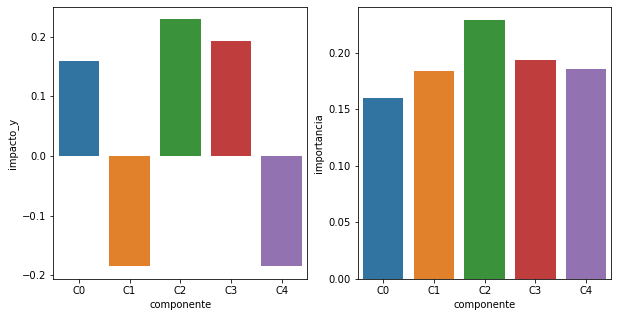

In [127]:
n=5
pls_fit = PLSRegression(n_components=n)
pls_fit.fit(X_train, y_train)
imp_componente = pd.DataFrame(
    pls_fit.y_loadings_.T, index=["C" + str(i) for i in range(n)], columns=["impacto_y"]
)
imp_componente["componente"] = imp_componente.index
imp_componente["importancia"] = abs(imp_componente["impacto_y"])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=imp_componente, y="impacto_y", x="componente", ax=ax[0])
sns.barplot(data=imp_componente, y="importancia", x="componente", ax=ax[1])

In [128]:
imp_var = pd.DataFrame(
    pls_fit.x_loadings_, index=X_train.columns, columns=["C" + str(i) for i in range(n)]
)
imp_var

,C0,C1,C2,C3,C4
pet_shift_06_outros,0.204394,0.187989,0.284618,-0.373818,0.146214
fert_shift_03_outros,0.184796,0.443850,-0.086551,-0.078172,-0.095727
pet_shift_06_russia,0.139749,0.168576,-0.086286,0.436744,0.569716
fert_shift_03_russia,0.153697,0.447819,-0.109687,-0.022804,-0.226820
pet_shift_06_ucrania,-0.040568,0.033163,-0.067250,0.254061,0.207634
fert_shift_03_ucrania,-0.051414,-0.064002,-0.160306,0.376109,-0.258067
preco_pet_mean06_outros,0.294810,-0.130885,-0.194331,0.017010,-0.186435
preco_fert_mean03_outros,0.271206,-0.276139,-0.261295,0.012820,-0.034041
preco_pet_mean06_russia,0.256304,-0.153047,-0.336229,0.007104,-0.001299
preco_fert_mean03_russia,0.291321,-0.143250,-0.221134,0.144757,-0.190635


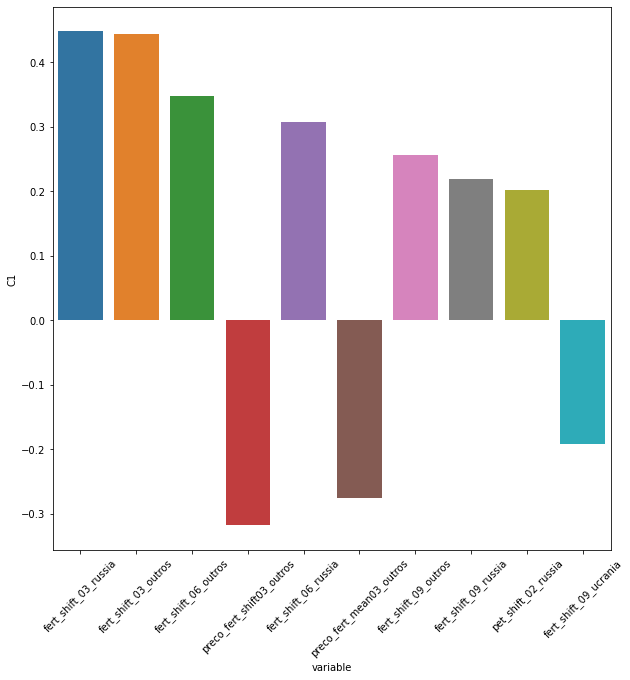

In [129]:
imp_var["variable"] = imp_var.index
fig, ax = plt.subplots(figsize=(10, 10))
component = "C1"
imp_var = imp_var.sort_values(component, ascending=False)
imp_var["abs_comp"] = abs(imp_var[component])
imp_var_sel = imp_var.nlargest(10, "abs_comp")
sns.barplot(data=imp_var_sel, y=component, x="variable")
plt.xticks(rotation=45);

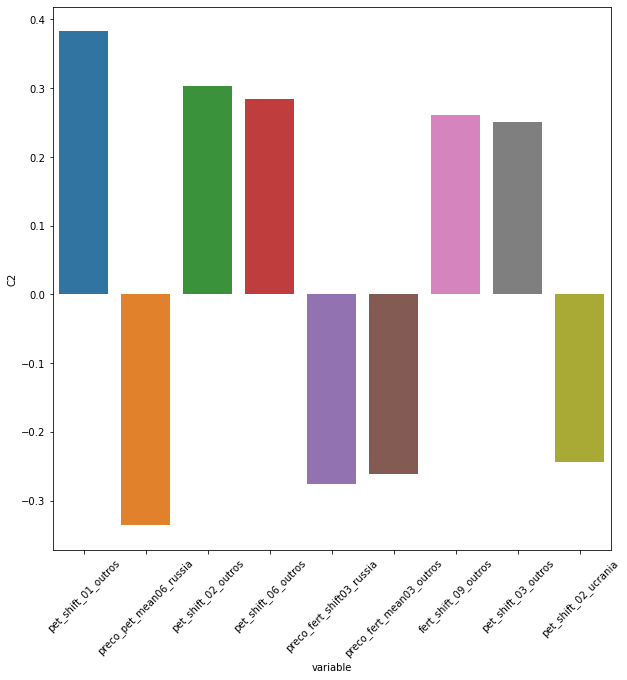

In [130]:
imp_var["variable"] = imp_var.index
fig, ax = plt.subplots(figsize=(10, 10))
component = "C2"
imp_var = imp_var.sort_values(component, ascending=False)
imp_var["abs_comp"] = abs(imp_var[component])
imp_var_sel = imp_var.nlargest(10, "abs_comp")
sns.barplot(data=imp_var_sel, y=component, x="variable")
plt.xticks(rotation=45);

In [131]:
y_pred = pls_fit.predict(X_test)
from sklearn.metrics import mean_squared_error

print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.exp(np.mean(y_test)), 2)}"
)

Erro de $0.32 em $0.32


In [132]:
tb_comex_total_3['pred_preco_pls_chutes'] = np.exp(pls_fit.predict(reg_scaler.transform(tb_comex_total_3[chutes])))

/Users/carolinalewin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PLSRegression was fitted with feature names
  warnings.warn(


In [133]:
X_var = chutes
y_var = 'preco_exp_mean12_log'
X_train, X_test, y_train, y_test = train_test_split(tb_comex_total_3[X_var], tb_comex_total_3[y_var], test_size = 0.2, random_state = 42)
reg_scaler = StandardScaler()
reg_scaler.fit(X_train)
las_fit = LassoCV(cv = 3)
las_fit.fit(reg_scaler.transform(X_train), y_train)
pred_reg = las_fit.predict(reg_scaler.transform(X_test))
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred_reg))}")

RMSE: 0.1567690432632409


In [134]:
pd.DataFrame(las_fit.coef_, index = X_var)

,0
pet_shift_06_outros,0.000604
fert_shift_03_outros,-0.020490
pet_shift_06_russia,-0.000000
fert_shift_03_russia,-0.003394
pet_shift_06_ucrania,-0.000671
fert_shift_03_ucrania,-0.000961
preco_pet_mean06_outros,0.000000
preco_fert_mean03_outros,0.098454
preco_pet_mean06_russia,-0.000000
preco_fert_mean03_russia,0.010156


In [136]:
tb_comex_total_3['pred_precomedio_las_chutes'] = np.exp(las_fit.predict(reg_scaler.transform(tb_comex_total_3[chutes])))

<AxesSubplot:xlabel='componente', ylabel='importancia'>

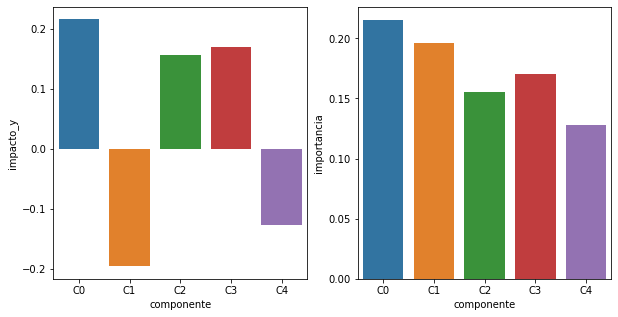

In [137]:
n=5
pls_fit = PLSRegression(n_components=n)
pls_fit.fit(X_train, y_train)
imp_componente = pd.DataFrame(
    pls_fit.y_loadings_.T, index=["C" + str(i) for i in range(n)], columns=["impacto_y"]
)
imp_componente["componente"] = imp_componente.index
imp_componente["importancia"] = abs(imp_componente["impacto_y"])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=imp_componente, y="impacto_y", x="componente", ax=ax[0])
sns.barplot(data=imp_componente, y="importancia", x="componente", ax=ax[1])


In [138]:
imp_var = pd.DataFrame(
    pls_fit.x_loadings_, index=X_train.columns, columns=["C" + str(i) for i in range(n)]
)
imp_var

,C0,C1,C2,C3,C4
pet_shift_06_outros,0.205252,0.163086,0.367191,-0.218518,0.181348
fert_shift_03_outros,0.162182,0.358314,0.048274,-0.136249,-0.018107
pet_shift_06_russia,0.130723,0.183003,-0.084016,0.557743,0.562026
fert_shift_03_russia,0.127584,0.358105,0.010659,-0.112984,-0.147760
pet_shift_06_ucrania,-0.051151,0.037092,-0.110100,0.296653,0.155672
fert_shift_03_ucrania,-0.045865,-0.062487,-0.189538,0.026525,-0.169714
preco_pet_mean06_outros,0.334357,-0.031883,-0.121918,-0.070151,0.001817
preco_fert_mean03_outros,0.322902,-0.145403,-0.178983,0.115194,-0.113877
preco_pet_mean06_russia,0.293708,-0.045821,-0.276656,-0.137161,0.075019
preco_fert_mean03_russia,0.329518,-0.030755,-0.169125,0.126666,-0.122112


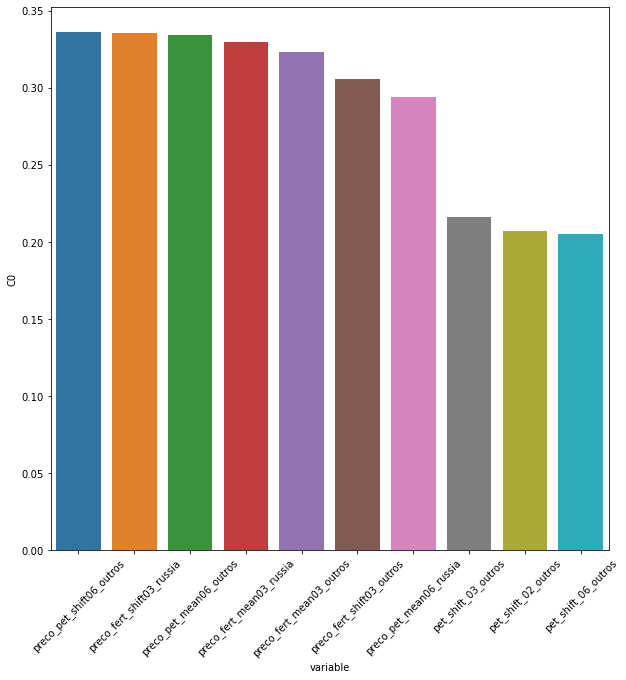

In [139]:
imp_var["variable"] = imp_var.index
fig, ax = plt.subplots(figsize=(10, 10))
component = "C0"
imp_var = imp_var.sort_values(component, ascending=False)
imp_var["abs_comp"] = abs(imp_var[component])
imp_var_sel = imp_var.nlargest(10, "abs_comp")
sns.barplot(data=imp_var_sel, y=component, x="variable")
plt.xticks(rotation=45);

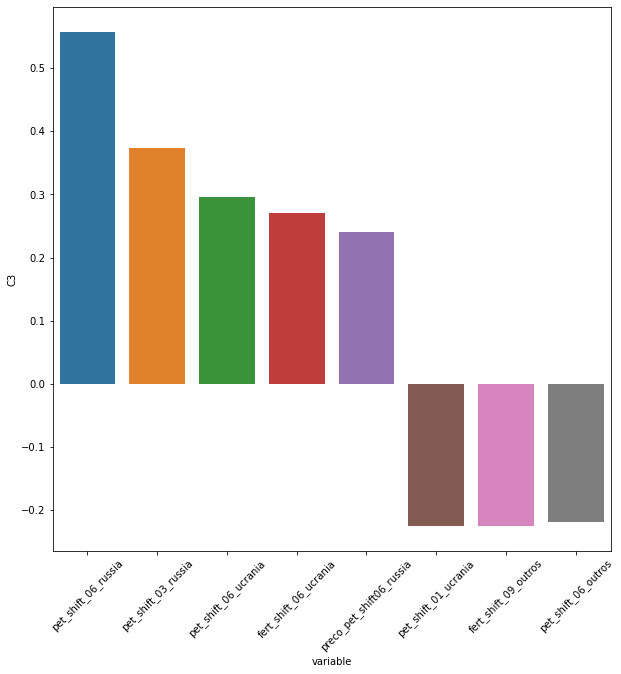

In [140]:
imp_var["variable"] = imp_var.index
fig, ax = plt.subplots(figsize=(10, 10))
component = "C3"
imp_var = imp_var.sort_values(component, ascending=False)
imp_var["abs_comp"] = abs(imp_var[component])
imp_var_sel = imp_var.nlargest(10, "abs_comp")
sns.barplot(data=imp_var_sel, y=component, x="variable")
plt.xticks(rotation=45);

In [141]:
y_pred = pls_fit.predict(X_test)
from sklearn.metrics import mean_squared_error

print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)} em ${round(np.exp(np.mean(y_test)), 2)}"
)

Erro de $0.15 em $0.3


In [142]:
tb_comex_total_3['pred_precomedio_pls_chutes'] = np.exp(pls_fit.predict(reg_scaler.transform(tb_comex_total_3[chutes])))

/Users/carolinalewin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PLSRegression was fitted with feature names
  warnings.warn(


''

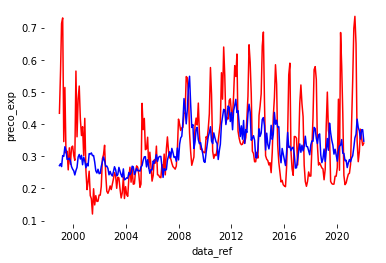

In [143]:
sns.lineplot(data=tb_comex_total_3,x = 'data_ref', y = 'preco_exp',color = 'red')
#sns.lineplot(data=tb_comex_total_3,x = 'data_ref', y = 'pred_preco_las_BAU',color = 'black')
#sns.lineplot(data=tb_comex_total_3,x = 'data_ref', y = 'pred_preco_las_shift',color = 'orange')
sns.lineplot(data=tb_comex_total_3,x = 'data_ref', y = 'pred_preco_las_chutes',color = 'blue')

sns.despine(left=True, bottom=True)
;

''

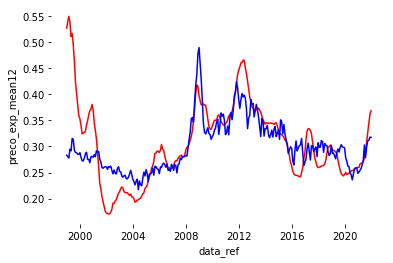

In [144]:
sns.lineplot(data=tb_comex_total_3,x = 'data_ref', y = 'preco_exp_mean12',color = 'red')
#sns.lineplot(data=tb_comex_total_3,x = 'data_ref', y = 'pred_precomedio_las_BAU',color = 'black')
#sns.lineplot(data=tb_comex_total_3,x = 'data_ref', y = 'pred_precomedio_las_shift',color = 'orange')
sns.lineplot(data=tb_comex_total_3,x = 'data_ref', y = 'pred_precomedio_las_chutes',color = 'blue')

sns.despine(left=True, bottom=True)
;

In [145]:
X_var = chutes
y_var1 = 'preco_exp_log'
X_train1, X_test1, y_train1, y_test1 = train_test_split(tb_comex_total_3[X_var], tb_comex_total_3[y_var1], test_size = 0.2, random_state = 42)

reg_scaler = StandardScaler()
reg_scaler.fit(X_train)
las_fit1 = LassoCV(cv = 3)
las_fit1.fit(reg_scaler.transform(X_train1), y_train1)
pred_reg1 = las_fit1.predict(reg_scaler.transform(X_test1))
print(f"RMSE: {np.sqrt(mean_squared_error(y_test1, pred_reg1))}")

y_var2 = 'preco_exp_mean12_log'
X_train2, X_test2, y_train2, y_test2 = train_test_split(tb_comex_total_3[X_var], tb_comex_total_3[y_var2], test_size = 0.2, random_state = 42)

las_fit2 = LassoCV(cv = 3)
las_fit2.fit(reg_scaler.transform(X_train2), y_train2)
pred_reg2 = las_fit2.predict(reg_scaler.transform(X_test2))
print(f"RMSE: {np.sqrt(mean_squared_error(y_test2, pred_reg2))}")

#############

n=5
pls_fit1 = PLSRegression(n_components=n)
pls_fit1.fit(X_train1, y_train1)

pls_fit2 = PLSRegression(n_components=n)
pls_fit2.fit(X_train2, y_train2)

y_pred1 = pls_fit1.predict(X_test1)
y_pred2 = pls_fit2.predict(X_test2)

print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test1, y_pred1)), 2)} em ${round(np.exp(np.mean(y_test1)), 2)}"
)

print(
    f"Erro de ${round(np.sqrt(mean_squared_error(y_test2, y_pred2)), 2)} em ${round(np.exp(np.mean(y_test2)), 2)}"
)


RMSE: 0.3088703529822748
RMSE: 0.1567690432632409
Erro de $0.32 em $0.32
Erro de $0.15 em $0.3


In [193]:
#Cenarios de simulacao ("https://docs.google.com/spreadsheets/d/e/2PACX-1vR2USCvb1X43nYcD0mf-j8SL6ZOz1MN1JamsYD0VDE0z5FM2RIF9xLpXaMJzybAYk16vnImC_q8Yemk/pub?gid=988180446&single=true&output=csv")

In [194]:
tb_comex_2 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vR2USCvb1X43nYcD0mf-j8SL6ZOz1MN1JamsYD0VDE0z5FM2RIF9xLpXaMJzybAYk16vnImC_q8Yemk/pub?gid=988180446&single=true&output=csv")

In [195]:
#tb_comex_2.isnull().sum()

In [196]:
#tb_comex_2.info()

In [197]:
#tb_comex_2.describe()

In [198]:
tb_comex_2['data_ref'] =  tb_comex_2.apply(lambda x: date(year=x['co_ano'], month=x['co_mes'], day=1),axis=1)
tb_comex_2 = tb_comex_2.sort_values(by=['data_ref'])

In [199]:
#tb_comex_2.describe()

In [200]:
tb_comex_2 = tb_comex_2.dropna()

In [201]:
for i in tb_comex_2.columns.tolist():
    if i != 'data_ref':
        tb_comex_2[i].astype(float)
        tb_comex_2.update(tb_comex_2[i].fillna(0))

In [202]:
tb_comex_2['exp_kg_liquido_outros'] = tb_comex_2['exp_kg_liquido_total'] - tb_comex_2['exp_kg_liquido_russia'] - tb_comex_2['exp_kg_liquido_ucrania']
tb_comex_2['exp_vlr_outros'] = tb_comex_2['exp_vlr_total'] - tb_comex_2['exp_vlr_russia'] - tb_comex_2['exp_vlr_ucrania']
tb_comex_2['pet_kg_liquido_outros'] = tb_comex_2['pet_kg_liquido_total']- tb_comex_2['pet_kg_liquido_russia']- tb_comex_2['pet_kg_liquido_ucrania']
tb_comex_2['pet_vlr_outros'] = tb_comex_2['pet_vlr_total'] -  tb_comex_2['pet_vlr_russia'] - tb_comex_2['pet_vlr_ucrania'] 
tb_comex_2['fert_kg_liquido_outros'] = tb_comex_2['fert_kg_liquido_total'] -tb_comex_2['fert_kg_liquido_russia'] -  tb_comex_2['fert_kg_liquido_ucrania']
tb_comex_2['fert_vlr_outros'] = tb_comex_2['fert_vlr_total']- tb_comex_2['fert_vlr_russia']-tb_comex_2['fert_vlr_ucrania']

In [203]:
tb_comex_total_4 = tb_comex_2[['data_ref'
                        ,'exp_kg_liquido_total','exp_vlr_total'
                        ,'exp_kg_liquido_outros','exp_vlr_outros'
                        ,'pet_kg_liquido_outros','pet_vlr_outros'
                        ,'fert_kg_liquido_outros','fert_vlr_outros'
                        ,'exp_kg_liquido_russia','exp_kg_liquido_ucrania'
                        ,'exp_vlr_russia','exp_vlr_ucrania'
                        ,'pet_kg_liquido_russia','pet_kg_liquido_ucrania'
                        ,'pet_vlr_russia','pet_vlr_ucrania'
                        ,'fert_kg_liquido_russia','fert_kg_liquido_ucrania'
                        ,'fert_vlr_russia','fert_vlr_ucrania'
                            ]]

In [204]:
#tb_comex_total_4.describe()

In [205]:
#Transformacoes necessarias

In [206]:
#.rolling().mean():
#Exp
tb_comex_total_4['exp_rolling_00_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania']
tb_comex_total_4['exp_rolling_01_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].rolling(1).mean()
tb_comex_total_4['exp_rolling_02_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].rolling(2).mean()
tb_comex_total_4['exp_rolling_03_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].rolling(3).mean()
tb_comex_total_4['exp_rolling_06_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].rolling(6).mean()
tb_comex_total_4['exp_rolling_09_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].rolling(9).mean()
tb_comex_total_4['exp_rolling_12_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].rolling(12).mean()
tb_comex_total_4['exp_rolling_15_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].rolling(15).mean()
tb_comex_total_4['exp_rolling_18_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].rolling(18).mean()
#Fert
tb_comex_total_4['fert_rolling_00_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania']
tb_comex_total_4['fert_rolling_01_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].rolling(1).mean()
tb_comex_total_4['fert_rolling_02_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].rolling(2).mean()
tb_comex_total_4['fert_rolling_03_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].rolling(3).mean()
tb_comex_total_4['fert_rolling_06_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].rolling(6).mean()
tb_comex_total_4['fert_rolling_09_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].rolling(9).mean()
tb_comex_total_4['fert_rolling_12_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].rolling(12).mean()
tb_comex_total_4['fert_rolling_15_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].rolling(15).mean()
tb_comex_total_4['fert_rolling_18_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].rolling(18).mean()
#pet
tb_comex_total_4['pet_rolling_00_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania']
tb_comex_total_4['pet_rolling_01_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].rolling(1).mean()
tb_comex_total_4['pet_rolling_02_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].rolling(2).mean()
tb_comex_total_4['pet_rolling_03_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].rolling(3).mean()
tb_comex_total_4['pet_rolling_06_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].rolling(6).mean()
tb_comex_total_4['pet_rolling_09_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].rolling(9).mean()
tb_comex_total_4['pet_rolling_12_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].rolling(12).mean()
tb_comex_total_4['pet_rolling_15_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].rolling(15).mean()
tb_comex_total_4['pet_rolling_18_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].rolling(18).mean()

#Exp
tb_comex_total_4['exp_rolling_00_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania']
tb_comex_total_4['exp_rolling_01_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].rolling(1).mean()
tb_comex_total_4['exp_rolling_02_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].rolling(2).mean()
tb_comex_total_4['exp_rolling_03_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].rolling(3).mean()
tb_comex_total_4['exp_rolling_06_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].rolling(6).mean()
tb_comex_total_4['exp_rolling_09_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].rolling(9).mean()
tb_comex_total_4['exp_rolling_12_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].rolling(12).mean()
tb_comex_total_4['exp_rolling_15_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].rolling(15).mean()
tb_comex_total_4['exp_rolling_18_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].rolling(18).mean()
#Fert
tb_comex_total_4['fert_rolling_00_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania']
tb_comex_total_4['fert_rolling_01_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].rolling(1).mean()
tb_comex_total_4['fert_rolling_02_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].rolling(2).mean()
tb_comex_total_4['fert_rolling_03_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].rolling(3).mean()
tb_comex_total_4['fert_rolling_06_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].rolling(6).mean()
tb_comex_total_4['fert_rolling_09_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].rolling(9).mean()
tb_comex_total_4['fert_rolling_12_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].rolling(12).mean()
tb_comex_total_4['fert_rolling_15_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].rolling(15).mean()
tb_comex_total_4['fert_rolling_18_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].rolling(18).mean()
#pet
tb_comex_total_4['pet_rolling_00_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania']
tb_comex_total_4['pet_rolling_01_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].rolling(1).mean()
tb_comex_total_4['pet_rolling_02_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].rolling(2).mean()
tb_comex_total_4['pet_rolling_03_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].rolling(3).mean()
tb_comex_total_4['pet_rolling_06_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].rolling(6).mean()
tb_comex_total_4['pet_rolling_09_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].rolling(9).mean()
tb_comex_total_4['pet_rolling_12_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].rolling(12).mean()
tb_comex_total_4['pet_rolling_15_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].rolling(15).mean()
tb_comex_total_4['pet_rolling_18_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].rolling(18).mean()

#.rolling().mean():
#Exp
tb_comex_total_4['exp_rolling_00_vlr_russia'] = tb_comex_total_4['exp_vlr_russia']
tb_comex_total_4['exp_rolling_01_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].rolling(1).mean()
tb_comex_total_4['exp_rolling_02_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].rolling(2).mean()
tb_comex_total_4['exp_rolling_03_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].rolling(3).mean()
tb_comex_total_4['exp_rolling_06_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].rolling(6).mean()
tb_comex_total_4['exp_rolling_09_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].rolling(9).mean()
tb_comex_total_4['exp_rolling_12_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].rolling(12).mean()
tb_comex_total_4['exp_rolling_15_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].rolling(15).mean()
tb_comex_total_4['exp_rolling_18_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].rolling(18).mean()
#Fert
tb_comex_total_4['fert_rolling_00_vlr_russia'] = tb_comex_total_4['fert_vlr_russia']
tb_comex_total_4['fert_rolling_01_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].rolling(1).mean()
tb_comex_total_4['fert_rolling_02_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].rolling(2).mean()
tb_comex_total_4['fert_rolling_03_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].rolling(3).mean()
tb_comex_total_4['fert_rolling_06_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].rolling(6).mean()
tb_comex_total_4['fert_rolling_09_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].rolling(9).mean()
tb_comex_total_4['fert_rolling_12_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].rolling(12).mean()
tb_comex_total_4['fert_rolling_15_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].rolling(15).mean()
tb_comex_total_4['fert_rolling_18_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].rolling(18).mean()
#pet
tb_comex_total_4['pet_rolling_00_vlr_russia'] = tb_comex_total_4['pet_vlr_russia']
tb_comex_total_4['pet_rolling_01_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].rolling(1).mean()
tb_comex_total_4['pet_rolling_02_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].rolling(2).mean()
tb_comex_total_4['pet_rolling_03_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].rolling(3).mean()
tb_comex_total_4['pet_rolling_06_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].rolling(6).mean()
tb_comex_total_4['pet_rolling_09_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].rolling(9).mean()
tb_comex_total_4['pet_rolling_12_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].rolling(12).mean()
tb_comex_total_4['pet_rolling_15_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].rolling(15).mean()
tb_comex_total_4['pet_rolling_18_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].rolling(18).mean()

#Exp
tb_comex_total_4['exp_rolling_00_russia'] = tb_comex_total_4['exp_kg_liquido_russia']
tb_comex_total_4['exp_rolling_01_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].rolling(1).mean()
tb_comex_total_4['exp_rolling_02_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].rolling(2).mean()
tb_comex_total_4['exp_rolling_03_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].rolling(3).mean()
tb_comex_total_4['exp_rolling_06_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].rolling(6).mean()
tb_comex_total_4['exp_rolling_09_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].rolling(9).mean()
tb_comex_total_4['exp_rolling_12_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].rolling(12).mean()
tb_comex_total_4['exp_rolling_15_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].rolling(15).mean()
tb_comex_total_4['exp_rolling_18_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].rolling(18).mean()
#Fert
tb_comex_total_4['fert_rolling_00_russia'] = tb_comex_total_4['fert_kg_liquido_russia']
tb_comex_total_4['fert_rolling_01_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].rolling(1).mean()
tb_comex_total_4['fert_rolling_02_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].rolling(2).mean()
tb_comex_total_4['fert_rolling_03_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].rolling(3).mean()
tb_comex_total_4['fert_rolling_06_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].rolling(6).mean()
tb_comex_total_4['fert_rolling_09_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].rolling(9).mean()
tb_comex_total_4['fert_rolling_12_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].rolling(12).mean()
tb_comex_total_4['fert_rolling_15_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].rolling(15).mean()
tb_comex_total_4['fert_rolling_18_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].rolling(18).mean()
#pet
tb_comex_total_4['pet_rolling_00_russia'] = tb_comex_total_4['pet_kg_liquido_russia']
tb_comex_total_4['pet_rolling_01_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].rolling(1).mean()
tb_comex_total_4['pet_rolling_02_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].rolling(2).mean()
tb_comex_total_4['pet_rolling_03_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].rolling(3).mean()
tb_comex_total_4['pet_rolling_06_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].rolling(6).mean()
tb_comex_total_4['pet_rolling_09_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].rolling(9).mean()
tb_comex_total_4['pet_rolling_12_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].rolling(12).mean()
tb_comex_total_4['pet_rolling_15_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].rolling(15).mean()
tb_comex_total_4['pet_rolling_18_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].rolling(18).mean()

#.shift():
#Exp
tb_comex_total_4['exp_shift_00_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania']
tb_comex_total_4['exp_shift_01_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].shift(1)
tb_comex_total_4['exp_shift_02_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].shift(2)
tb_comex_total_4['exp_shift_03_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].shift(3)
tb_comex_total_4['exp_shift_06_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].shift(6)
tb_comex_total_4['exp_shift_09_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].shift(9)
tb_comex_total_4['exp_shift_12_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].shift(12)
tb_comex_total_4['exp_shift_15_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].shift(15)
tb_comex_total_4['exp_shift_18_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].shift(18)
#Fert
tb_comex_total_4['fert_shift_00_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania']
tb_comex_total_4['fert_shift_01_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].shift(1)
tb_comex_total_4['fert_shift_02_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].shift(2)
tb_comex_total_4['fert_shift_03_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].shift(3)
tb_comex_total_4['fert_shift_06_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].shift(6)
tb_comex_total_4['fert_shift_09_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].shift(9)
tb_comex_total_4['fert_shift_12_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].shift(12)
tb_comex_total_4['fert_shift_15_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].shift(15)
tb_comex_total_4['fert_shift_18_vlr_ucrania'] = tb_comex_total_4['fert_vlr_ucrania'].shift(18)
#pet
tb_comex_total_4['pet_shift_00_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania']
tb_comex_total_4['pet_shift_01_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].shift(1)
tb_comex_total_4['pet_shift_02_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].shift(2)
tb_comex_total_4['pet_shift_03_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].shift(3)
tb_comex_total_4['pet_shift_06_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].shift(6)
tb_comex_total_4['pet_shift_09_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].shift(9)
tb_comex_total_4['pet_shift_12_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].shift(12)
tb_comex_total_4['pet_shift_15_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].shift(15)
tb_comex_total_4['pet_shift_18_vlr_ucrania'] = tb_comex_total_4['pet_vlr_ucrania'].shift(18)

#Exp
tb_comex_total_4['exp_shift_00_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania']
tb_comex_total_4['exp_shift_01_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].shift(1)
tb_comex_total_4['exp_shift_02_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].shift(2)
tb_comex_total_4['exp_shift_03_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].shift(3)
tb_comex_total_4['exp_shift_06_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].shift(6)
tb_comex_total_4['exp_shift_09_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].shift(9)
tb_comex_total_4['exp_shift_12_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].shift(12)
tb_comex_total_4['exp_shift_15_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].shift(15)
tb_comex_total_4['exp_shift_18_ucrania'] = tb_comex_total_4['exp_kg_liquido_ucrania'].shift(18)
#Fert
tb_comex_total_4['fert_shift_00_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania']
tb_comex_total_4['fert_shift_01_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].shift(1)
tb_comex_total_4['fert_shift_02_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].shift(2)
tb_comex_total_4['fert_shift_03_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].shift(3)
tb_comex_total_4['fert_shift_06_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].shift(6)
tb_comex_total_4['fert_shift_09_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].shift(9)
tb_comex_total_4['fert_shift_12_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].shift(12)
tb_comex_total_4['fert_shift_15_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].shift(15)
tb_comex_total_4['fert_shift_18_ucrania'] = tb_comex_total_4['fert_kg_liquido_ucrania'].shift(18)
#pet
tb_comex_total_4['pet_shift_00_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania']
tb_comex_total_4['pet_shift_01_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].shift(1)
tb_comex_total_4['pet_shift_02_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].shift(2)
tb_comex_total_4['pet_shift_03_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].shift(3)
tb_comex_total_4['pet_shift_06_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].shift(6)
tb_comex_total_4['pet_shift_09_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].shift(9)
tb_comex_total_4['pet_shift_12_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].shift(12)
tb_comex_total_4['pet_shift_15_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].shift(15)
tb_comex_total_4['pet_shift_18_ucrania'] = tb_comex_total_4['pet_kg_liquido_ucrania'].shift(18)
#.shift():
#Exp
tb_comex_total_4['exp_shift_00_vlr_russia'] = tb_comex_total_4['exp_vlr_russia']
tb_comex_total_4['exp_shift_01_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].shift(1)
tb_comex_total_4['exp_shift_02_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].shift(2)
tb_comex_total_4['exp_shift_03_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].shift(3)
tb_comex_total_4['exp_shift_06_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].shift(6)
tb_comex_total_4['exp_shift_09_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].shift(9)
tb_comex_total_4['exp_shift_12_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].shift(12)
tb_comex_total_4['exp_shift_15_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].shift(15)
tb_comex_total_4['exp_shift_18_vlr_russia'] = tb_comex_total_4['exp_vlr_russia'].shift(18)
#Fert
tb_comex_total_4['fert_shift_00_vlr_russia'] = tb_comex_total_4['fert_vlr_russia']
tb_comex_total_4['fert_shift_01_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].shift(1)
tb_comex_total_4['fert_shift_02_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].shift(2)
tb_comex_total_4['fert_shift_03_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].shift(3)
tb_comex_total_4['fert_shift_06_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].shift(6)
tb_comex_total_4['fert_shift_09_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].shift(9)
tb_comex_total_4['fert_shift_12_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].shift(12)
tb_comex_total_4['fert_shift_15_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].shift(15)
tb_comex_total_4['fert_shift_18_vlr_russia'] = tb_comex_total_4['fert_vlr_russia'].shift(18)
#pet
tb_comex_total_4['pet_shift_00_vlr_russia'] = tb_comex_total_4['pet_vlr_russia']
tb_comex_total_4['pet_shift_01_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].shift(1)
tb_comex_total_4['pet_shift_02_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].shift(2)
tb_comex_total_4['pet_shift_03_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].shift(3)
tb_comex_total_4['pet_shift_06_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].shift(6)
tb_comex_total_4['pet_shift_09_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].shift(9)
tb_comex_total_4['pet_shift_12_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].shift(12)
tb_comex_total_4['pet_shift_15_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].shift(15)
tb_comex_total_4['pet_shift_18_vlr_russia'] = tb_comex_total_4['pet_vlr_russia'].shift(18)

#Exp
tb_comex_total_4['exp_shift_00_russia'] = tb_comex_total_4['exp_kg_liquido_russia']
tb_comex_total_4['exp_shift_01_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].shift(1)
tb_comex_total_4['exp_shift_02_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].shift(2)
tb_comex_total_4['exp_shift_03_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].shift(3)
tb_comex_total_4['exp_shift_06_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].shift(6)
tb_comex_total_4['exp_shift_09_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].shift(9)
tb_comex_total_4['exp_shift_12_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].shift(12)
tb_comex_total_4['exp_shift_15_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].shift(15)
tb_comex_total_4['exp_shift_18_russia'] = tb_comex_total_4['exp_kg_liquido_russia'].shift(18)
#Fert
tb_comex_total_4['fert_shift_00_russia'] = tb_comex_total_4['fert_kg_liquido_russia']
tb_comex_total_4['fert_shift_01_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].shift(1)
tb_comex_total_4['fert_shift_02_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].shift(2)
tb_comex_total_4['fert_shift_03_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].shift(3)
tb_comex_total_4['fert_shift_06_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].shift(6)
tb_comex_total_4['fert_shift_09_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].shift(9)
tb_comex_total_4['fert_shift_12_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].shift(12)
tb_comex_total_4['fert_shift_15_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].shift(15)
tb_comex_total_4['fert_shift_18_russia'] = tb_comex_total_4['fert_kg_liquido_russia'].shift(18)
#pet
tb_comex_total_4['pet_shift_00_russia'] = tb_comex_total_4['pet_kg_liquido_russia']
tb_comex_total_4['pet_shift_01_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].shift(1)
tb_comex_total_4['pet_shift_02_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].shift(2)
tb_comex_total_4['pet_shift_03_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].shift(3)
tb_comex_total_4['pet_shift_06_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].shift(6)
tb_comex_total_4['pet_shift_09_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].shift(9)
tb_comex_total_4['pet_shift_12_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].shift(12)
tb_comex_total_4['pet_shift_15_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].shift(15)
tb_comex_total_4['pet_shift_18_russia'] = tb_comex_total_4['pet_kg_liquido_russia'].shift(18)
#.shift():
#Exp
tb_comex_total_4['exp_shift_00_vlr_outros'] = tb_comex_total_4['exp_vlr_outros']
tb_comex_total_4['exp_shift_01_vlr_outros'] = tb_comex_total_4['exp_vlr_outros'].shift(1)
tb_comex_total_4['exp_shift_02_vlr_outros'] = tb_comex_total_4['exp_vlr_outros'].shift(2)
tb_comex_total_4['exp_shift_03_vlr_outros'] = tb_comex_total_4['exp_vlr_outros'].shift(3)
tb_comex_total_4['exp_shift_06_vlr_outros'] = tb_comex_total_4['exp_vlr_outros'].shift(6)
tb_comex_total_4['exp_shift_09_vlr_outros'] = tb_comex_total_4['exp_vlr_outros'].shift(9)
tb_comex_total_4['exp_shift_12_vlr_outros'] = tb_comex_total_4['exp_vlr_outros'].shift(12)
tb_comex_total_4['exp_shift_15_vlr_outros'] = tb_comex_total_4['exp_vlr_outros'].shift(15)
tb_comex_total_4['exp_shift_18_vlr_outros'] = tb_comex_total_4['exp_vlr_outros'].shift(18)
#Fert
tb_comex_total_4['fert_shift_00_vlr_outros'] = tb_comex_total_4['fert_vlr_outros']
tb_comex_total_4['fert_shift_01_vlr_outros'] = tb_comex_total_4['fert_vlr_outros'].shift(1)
tb_comex_total_4['fert_shift_02_vlr_outros'] = tb_comex_total_4['fert_vlr_outros'].shift(2)
tb_comex_total_4['fert_shift_03_vlr_outros'] = tb_comex_total_4['fert_vlr_outros'].shift(3)
tb_comex_total_4['fert_shift_06_vlr_outros'] = tb_comex_total_4['fert_vlr_outros'].shift(6)
tb_comex_total_4['fert_shift_09_vlr_outros'] = tb_comex_total_4['fert_vlr_outros'].shift(9)
tb_comex_total_4['fert_shift_12_vlr_outros'] = tb_comex_total_4['fert_vlr_outros'].shift(12)
tb_comex_total_4['fert_shift_15_vlr_outros'] = tb_comex_total_4['fert_vlr_outros'].shift(15)
tb_comex_total_4['fert_shift_18_vlr_outros'] = tb_comex_total_4['fert_vlr_outros'].shift(18)
#pet
tb_comex_total_4['pet_shift_00_vlr_outros'] = tb_comex_total_4['pet_vlr_outros']
tb_comex_total_4['pet_shift_01_vlr_outros'] = tb_comex_total_4['pet_vlr_outros'].shift(1)
tb_comex_total_4['pet_shift_02_vlr_outros'] = tb_comex_total_4['pet_vlr_outros'].shift(2)
tb_comex_total_4['pet_shift_03_vlr_outros'] = tb_comex_total_4['pet_vlr_outros'].shift(3)
tb_comex_total_4['pet_shift_06_vlr_outros'] = tb_comex_total_4['pet_vlr_outros'].shift(6)
tb_comex_total_4['pet_shift_09_vlr_outros'] = tb_comex_total_4['pet_vlr_outros'].shift(9)
tb_comex_total_4['pet_shift_12_vlr_outros'] = tb_comex_total_4['pet_vlr_outros'].shift(12)
tb_comex_total_4['pet_shift_15_vlr_outros'] = tb_comex_total_4['pet_vlr_outros'].shift(15)
tb_comex_total_4['pet_shift_18_vlr_outros'] = tb_comex_total_4['pet_vlr_outros'].shift(18)

#Exp
tb_comex_total_4['exp_shift_00_outros'] = tb_comex_total_4['exp_kg_liquido_outros']
tb_comex_total_4['exp_shift_01_outros'] = tb_comex_total_4['exp_kg_liquido_outros'].shift(1)
tb_comex_total_4['exp_shift_02_outros'] = tb_comex_total_4['exp_kg_liquido_outros'].shift(2)
tb_comex_total_4['exp_shift_03_outros'] = tb_comex_total_4['exp_kg_liquido_outros'].shift(3)
tb_comex_total_4['exp_shift_06_outros'] = tb_comex_total_4['exp_kg_liquido_outros'].shift(6)
tb_comex_total_4['exp_shift_09_outros'] = tb_comex_total_4['exp_kg_liquido_outros'].shift(9)
tb_comex_total_4['exp_shift_12_outros'] = tb_comex_total_4['exp_kg_liquido_outros'].shift(12)
tb_comex_total_4['exp_shift_15_outros'] = tb_comex_total_4['exp_kg_liquido_outros'].shift(15)
tb_comex_total_4['exp_shift_18_outros'] = tb_comex_total_4['exp_kg_liquido_outros'].shift(18)
#Fert
tb_comex_total_4['fert_shift_00_outros'] = tb_comex_total_4['fert_kg_liquido_outros']
tb_comex_total_4['fert_shift_01_outros'] = tb_comex_total_4['fert_kg_liquido_outros'].shift(1)
tb_comex_total_4['fert_shift_02_outros'] = tb_comex_total_4['fert_kg_liquido_outros'].shift(2)
tb_comex_total_4['fert_shift_03_outros'] = tb_comex_total_4['fert_kg_liquido_outros'].shift(3)
tb_comex_total_4['fert_shift_06_outros'] = tb_comex_total_4['fert_kg_liquido_outros'].shift(6)
tb_comex_total_4['fert_shift_09_outros'] = tb_comex_total_4['fert_kg_liquido_outros'].shift(9)
tb_comex_total_4['fert_shift_12_outros'] = tb_comex_total_4['fert_kg_liquido_outros'].shift(12)
tb_comex_total_4['fert_shift_15_outros'] = tb_comex_total_4['fert_kg_liquido_outros'].shift(15)
tb_comex_total_4['fert_shift_18_outros'] = tb_comex_total_4['fert_kg_liquido_outros'].shift(18)
#pet
tb_comex_total_4['pet_shift_00_outros'] = tb_comex_total_4['pet_kg_liquido_outros']
tb_comex_total_4['pet_shift_01_outros'] = tb_comex_total_4['pet_kg_liquido_outros'].shift(1)
tb_comex_total_4['pet_shift_02_outros'] = tb_comex_total_4['pet_kg_liquido_outros'].shift(2)
tb_comex_total_4['pet_shift_03_outros'] = tb_comex_total_4['pet_kg_liquido_outros'].shift(3)
tb_comex_total_4['pet_shift_06_outros'] = tb_comex_total_4['pet_kg_liquido_outros'].shift(6)
tb_comex_total_4['pet_shift_09_outros'] = tb_comex_total_4['pet_kg_liquido_outros'].shift(9)
tb_comex_total_4['pet_shift_12_outros'] = tb_comex_total_4['pet_kg_liquido_outros'].shift(12)
tb_comex_total_4['pet_shift_15_outros'] = tb_comex_total_4['pet_kg_liquido_outros'].shift(15)
tb_comex_total_4['pet_shift_18_outros'] = tb_comex_total_4['pet_kg_liquido_outros'].shift(18)

tb_comex_total_4['preco_exp'] = tb_comex_total_4['exp_vlr_total']/tb_comex_total_4['exp_kg_liquido_total']
tb_comex_total_4['preco_exp_mean12'] = tb_comex_total_4['exp_vlr_total'].rolling(12).sum()/tb_comex_total_4['exp_kg_liquido_total'].rolling(12).sum()

tb_comex_total_4['preco_pet_shift00_outros'] =  tb_comex_total_4['pet_vlr_outros']/tb_comex_total_4['pet_kg_liquido_outros']
tb_comex_total_4['preco_pet_shift06_outros'] =  tb_comex_total_4['pet_vlr_outros'].shift(6)/tb_comex_total_4['pet_kg_liquido_outros'].shift(6)
tb_comex_total_4['preco_pet_mean06_outros'] =  tb_comex_total_4['pet_vlr_outros'].rolling(6).sum()/tb_comex_total_4['pet_kg_liquido_outros'].rolling(6).sum()
tb_comex_total_4['preco_fert_shift00_outros'] =  tb_comex_total_4['fert_vlr_outros']/tb_comex_total_4['fert_kg_liquido_outros']
tb_comex_total_4['preco_fert_shift03_outros'] =  tb_comex_total_4['fert_vlr_outros'].shift(3)/tb_comex_total_4['fert_kg_liquido_outros'].shift(3)
tb_comex_total_4['preco_fert_mean03_outros'] =  tb_comex_total_4['fert_vlr_outros'].rolling(3).sum()/tb_comex_total_4['fert_kg_liquido_outros'].rolling(3).sum()

tb_comex_total_4['preco_pet_shift00_russia'] =  tb_comex_total_4['pet_vlr_russia']/tb_comex_total_4['pet_kg_liquido_russia']
tb_comex_total_4['preco_pet_shift06_russia'] =  tb_comex_total_4['pet_vlr_russia'].shift(6)/tb_comex_total_4['pet_kg_liquido_russia'].shift(6)
tb_comex_total_4['preco_pet_mean06_russia'] =  tb_comex_total_4['pet_vlr_russia'].rolling(6).sum()/tb_comex_total_4['pet_kg_liquido_russia'].rolling(6).sum()
tb_comex_total_4['preco_fert_shift00_russia'] =  tb_comex_total_4['fert_vlr_russia']/tb_comex_total_4['fert_kg_liquido_russia']
tb_comex_total_4['preco_fert_shift03_russia'] =  tb_comex_total_4['fert_vlr_russia'].shift(3)/tb_comex_total_4['fert_kg_liquido_russia'].shift(3)
tb_comex_total_4['preco_fert_mean03_russia'] =  tb_comex_total_4['fert_vlr_russia'].rolling(3).sum()/tb_comex_total_4['fert_kg_liquido_russia'].rolling(3).sum()

tb_comex_total_4['preco_pet_shift00_ucrania'] =  tb_comex_total_4['pet_vlr_ucrania']/tb_comex_total_4['pet_kg_liquido_ucrania']
tb_comex_total_4['preco_pet_shift06_ucrania'] =  tb_comex_total_4['pet_vlr_ucrania'].shift(6)/tb_comex_total_4['pet_kg_liquido_ucrania'].shift(6)
tb_comex_total_4['preco_pet_mean06_ucrania'] =  tb_comex_total_4['pet_vlr_ucrania'].rolling(6).sum()/tb_comex_total_4['pet_kg_liquido_ucrania'].rolling(6).sum()
tb_comex_total_4['preco_fert_shift00_ucrania'] =  tb_comex_total_4['fert_vlr_ucrania']/tb_comex_total_4['fert_kg_liquido_ucrania']
tb_comex_total_4['preco_fert_shift03_ucrania'] =  tb_comex_total_4['fert_vlr_ucrania'].shift(3)/tb_comex_total_4['fert_kg_liquido_ucrania'].shift(3)
tb_comex_total_4['preco_fert_mean03_ucrania'] =  tb_comex_total_4['fert_vlr_ucrania'].rolling(3).sum()/tb_comex_total_4['fert_kg_liquido_ucrania'].rolling(3).sum()


<ipython-input-206-439ed5c369e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_4['exp_rolling_00_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania']
<ipython-input-206-439ed5c369e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comex_total_4['exp_rolling_01_vlr_ucrania'] = tb_comex_total_4['exp_vlr_ucrania'].rolling(1).mean()
<ipython-input-206-439ed5c369e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [207]:
chutes =['pet_shift_06_outros', 'fert_shift_03_outros'
        ,'pet_shift_06_russia', 'fert_shift_03_russia'
        ,'pet_shift_06_ucrania', 'fert_shift_03_ucrania'
        ,'preco_pet_mean06_outros', 'preco_fert_mean03_outros'
        ,'preco_pet_mean06_russia', 'preco_fert_mean03_russia'
        ,'preco_pet_mean06_ucrania', 'preco_fert_mean03_ucrania'
        ,'preco_pet_shift06_outros', 'preco_fert_shift03_outros'
        ,'preco_pet_shift06_russia', 'preco_fert_shift03_russia'
        ,'preco_pet_shift06_ucrania', 'preco_fert_shift03_ucrania'
        ,'pet_shift_03_outros','pet_shift_01_outros','pet_shift_02_outros','pet_shift_06_outros'
        ,'pet_shift_03_russia','pet_shift_01_russia','pet_shift_02_russia','pet_shift_06_russia'
        ,'pet_shift_03_ucrania','pet_shift_01_ucrania','pet_shift_02_ucrania','pet_shift_06_ucrania'
        ,'fert_shift_06_outros','fert_shift_09_outros'
        ,'fert_shift_06_russia','fert_shift_09_russia'
        ,'fert_shift_06_ucrania','fert_shift_09_ucrania'
        ]

In [208]:
#tb_comex_total_4[chutes].isnull().sum()

In [209]:
for i in tb_comex_total_4.columns.tolist():
    tb_comex_total_4.update(tb_comex_total_4[i].fillna(0))

In [210]:
#tb_comex_total_4[chutes].describe()

In [211]:
#aplica os 4 predicts
#X_Var e y_var

In [212]:
tb_comex_total_4['pred_las_preco'] = np.exp(las_fit1.predict(reg_scaler.transform(tb_comex_total_4[chutes])))
tb_comex_total_4['pred_las_precomedio'] = np.exp(las_fit2.predict(reg_scaler.transform(tb_comex_total_4[chutes])))
tb_comex_total_4['pred_pls_preco'] = np.exp(pls_fit1.predict(reg_scaler.transform(tb_comex_total_4[chutes])))
tb_comex_total_4['pred_pls_precomedio'] = np.exp(pls_fit2.predict(reg_scaler.transform(tb_comex_total_4[chutes])))

/Users/carolinalewin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PLSRegression was fitted with feature names
  warnings.warn(
/Users/carolinalewin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PLSRegression was fitted with feature names
  warnings.warn(


In [213]:
mask_2021 = tb_comex_total_4['data_ref'] > date(year=2022, month=1, day=31)
tb_comex_total_4 = tb_comex_total_4[mask_2021]

''

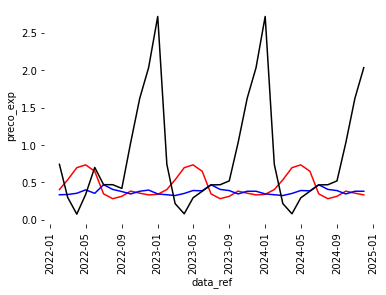

In [214]:
sns.lineplot(data=tb_comex_total_4,x = 'data_ref', y = 'preco_exp',color = 'red')
sns.lineplot(data=tb_comex_total_4,x = 'data_ref', y = 'pred_las_preco',color = 'blue')
sns.lineplot(data=tb_comex_total_4,x = 'data_ref', y = 'pred_pls_preco',color = 'black')
plt.xticks(rotation = 90)
sns.despine(left=True, bottom=True)
;

''

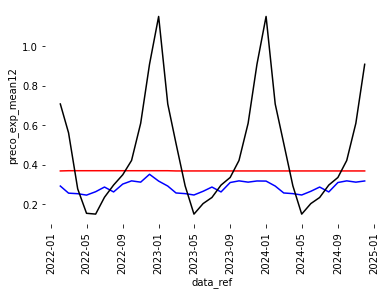

In [215]:
sns.lineplot(data=tb_comex_total_4,x = 'data_ref', y = 'preco_exp_mean12',color = 'red')
sns.lineplot(data=tb_comex_total_4,x = 'data_ref', y = 'pred_las_precomedio',color = 'blue')
sns.lineplot(data=tb_comex_total_4,x = 'data_ref', y = 'pred_pls_precomedio',color = 'black')
plt.xticks(rotation = 90)
sns.despine(left=True, bottom=True)
;